In [103]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import scorer
from sklearn.metrics import make_scorer

#Importing Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

#Importing ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [24]:
df = pd.read_csv('melb_data.csv',nrows=5000)

## Data Attributes

**Rooms**: Number of rooms
<br>
**Price**: Price in dollars
<br>
**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
<br>
**Type**: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
<br>
**SellerG**: Real Estate Agent
<br>
**Date**: Date sold
<br>
**Distance**: Distance from CBD
<br>
**Regionname**: General Region (West, North West, North, North east …etc)
<br>
**Propertycount**: Number of properties that exist in the suburb.
<br>
**Bedroom2** : Scraped # of Bedrooms (from different source)
<br>
**Bathroom**: Number of Bathrooms
<br>
**Car**: Number of carspots
<br>
**Landsize**: Land Size
<br>
**BuildingArea**: Building Size
<br>
**CouncilArea**: Governing council for the area
<br>

## 1. Data Cleaning and Preprocessing

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5000 non-null   object 
 1   Address        5000 non-null   object 
 2   Rooms          5000 non-null   int64  
 3   Type           5000 non-null   object 
 4   Price          5000 non-null   float64
 5   Method         5000 non-null   object 
 6   SellerG        5000 non-null   object 
 7   Date           5000 non-null   object 
 8   Distance       5000 non-null   float64
 9   Postcode       5000 non-null   float64
 10  Bedroom2       5000 non-null   float64
 11  Bathroom       5000 non-null   float64
 12  Car            5000 non-null   float64
 13  Landsize       5000 non-null   float64
 14  BuildingArea   2838 non-null   float64
 15  YearBuilt      3224 non-null   float64
 16  CouncilArea    5000 non-null   object 
 17  Lattitude      5000 non-null   float64
 18  Longtitu

Terdapat 2 data attributes yang berisi nilai NaN, karena Building Area, Year Built, dan Council Area bukan merupakan variable yg siginifikan, maka kita putuskan untuk drop 2 variable tsb

In [27]:
df_new = df.drop(['BuildingArea','YearBuilt'],1)

In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5000 non-null   object 
 1   Address        5000 non-null   object 
 2   Rooms          5000 non-null   int64  
 3   Type           5000 non-null   object 
 4   Price          5000 non-null   float64
 5   Method         5000 non-null   object 
 6   SellerG        5000 non-null   object 
 7   Date           5000 non-null   object 
 8   Distance       5000 non-null   float64
 9   Postcode       5000 non-null   float64
 10  Bedroom2       5000 non-null   float64
 11  Bathroom       5000 non-null   float64
 12  Car            5000 non-null   float64
 13  Landsize       5000 non-null   float64
 14  CouncilArea    5000 non-null   object 
 15  Lattitude      5000 non-null   float64
 16  Longtitude     5000 non-null   float64
 17  Regionname     5000 non-null   object 
 18  Property

Terlihat data sudah tidak terdapat nilai Null/ NaN

In [31]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,5000.0,2.888800e+00,0.963649,1.0000,2.000000,3.0000,3.000000e+00,8.000000e+00
Price,5000.0,1.137445e+06,671591.277922,85000.0000,680000.000000,950000.0000,1.417062e+06,6.500000e+06
Distance,5000.0,8.698000e+00,3.396407,1.6000,5.900000,8.8000,1.120000e+01,1.500000e+01
Postcode,5000.0,3.099182e+03,60.119980,3000.0000,3046.000000,3081.0000,3.148000e+03,3.207000e+03
Bedroom2,5000.0,2.845400e+00,0.955239,0.0000,2.000000,3.0000,3.000000e+00,9.000000e+00
Bathroom,5000.0,1.535000e+00,0.716434,0.0000,1.000000,1.0000,2.000000e+00,8.000000e+00
Car,5000.0,1.556400e+00,0.920972,0.0000,1.000000,1.0000,2.000000e+00,8.000000e+00
Landsize,5000.0,4.567320e+02,1343.621956,0.0000,145.000000,347.5000,6.192500e+02,7.510000e+04
Lattitude,5000.0,-3.781416e+01,0.063795,-37.9462,-37.860825,-37.7997,-3.776520e+01,-3.769490e+01
Longtitude,5000.0,1.449913e+02,0.072481,144.8075,144.934875,144.9977,1.450495e+02,1.451438e+02


In [34]:
listItem = []

for col in df_new.columns:
    listItem.append([col, df_new[col].dtype, df_new[col].isna().sum(), round((df_new[col].isna().sum())/len(df_new[col])), 
                    df_new[col].nunique(), list(df_new[col].drop_duplicates().sample().values)])

dfDesc = pd.DataFrame(columns=['data features', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=listItem)
dfDesc

,data features,dataType,null,nullPct,unique,uniqueSample
0,Suburb,object,0,0.0,84,[Essendon North]
1,Address,object,0,0.0,4956,[39 Morley St]
2,Rooms,int64,0,0.0,8,[7]
3,Type,object,0,0.0,3,[u]
4,Price,float64,0,0.0,1400,[616000.0]
5,Method,object,0,0.0,5,[VB]
6,SellerG,object,0,0.0,158,[Greg]
7,Date,object,0,0.0,35,[25/02/2017]
8,Distance,float64,0,0.0,68,[6.3]
9,Postcode,float64,0,0.0,70,[3143.0]


## 2. EDA

### Univariate Analysis

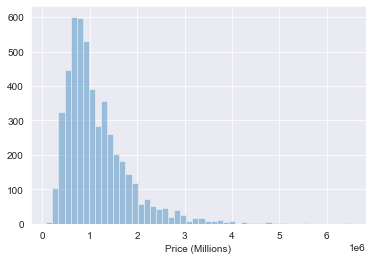

In [50]:
sns.set_style('darkgrid')

# Create histogram
sns.distplot(df_new['Price'],kde = False)
plt.xlabel('Price (Millions)')
plt.show()

We can tell that, price distribution is righ skewt

### Bivariate Analysis

### Categorical Features

In [52]:
# Identify categorical variables
categorical = df_new.select_dtypes(['category']).columns
print(categorical)
len(categorical)

Index([], dtype='object')


0

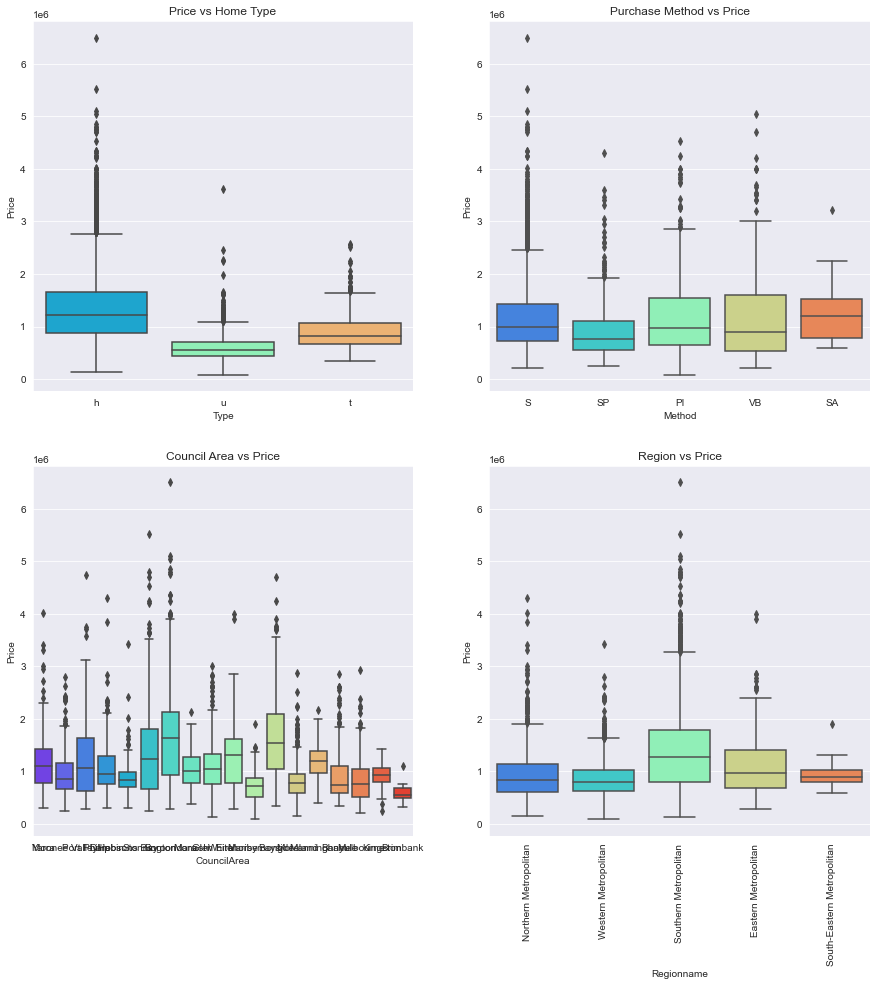

In [60]:
# Create subplot
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
p1 =sns.boxplot(df_new.Type, df_new.Price, ax = axes[0,0], palette = 'rainbow')
p1.title.set_text('Price vs Home Type')

# Plot [0,1]
p2 = sns.boxplot(df_new.Method, df_new.Price, ax = axes[0,1],palette = 'rainbow')
p2.title.set_text('Purchase Method vs Price')

# Plot [1,0]
p3 = sns.boxplot(df_new.CouncilArea, df_new.Price, ax=axes[1,0],palette = 'rainbow')
p3.title.set_text('Council Area vs Price')
plt.xticks(rotation = 90)

# Plot [1,1]
p4 = sns.boxplot(df_new.Regionname, df_new.Price, ax = axes[1,1],palette = 'rainbow')
p4.title.set_text('Region vs Price')
plt.xticks(rotation = 90)
plt.show()

### Numeric Features

In [62]:
# Stat summary
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,5000.0,2.888800e+00,0.963649,1.0000,2.000000,3.0000,3.000000e+00,8.000000e+00
Price,5000.0,1.137445e+06,671591.277922,85000.0000,680000.000000,950000.0000,1.417062e+06,6.500000e+06
Distance,5000.0,8.698000e+00,3.396407,1.6000,5.900000,8.8000,1.120000e+01,1.500000e+01
Postcode,5000.0,3.099182e+03,60.119980,3000.0000,3046.000000,3081.0000,3.148000e+03,3.207000e+03
Bedroom2,5000.0,2.845400e+00,0.955239,0.0000,2.000000,3.0000,3.000000e+00,9.000000e+00
Bathroom,5000.0,1.535000e+00,0.716434,0.0000,1.000000,1.0000,2.000000e+00,8.000000e+00
Car,5000.0,1.556400e+00,0.920972,0.0000,1.000000,1.0000,2.000000e+00,8.000000e+00
Landsize,5000.0,4.567320e+02,1343.621956,0.0000,145.000000,347.5000,6.192500e+02,7.510000e+04
Lattitude,5000.0,-3.781416e+01,0.063795,-37.9462,-37.860825,-37.7997,-3.776520e+01,-3.769490e+01
Longtitude,5000.0,1.449913e+02,0.072481,144.8075,144.934875,144.9977,1.450495e+02,1.451438e+02


In [63]:
# Identify continuous variables
print(df_new.select_dtypes(['float']).columns)

Index(['Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'Lattitude', 'Longtitude', 'Propertycount'],
      dtype='object')


Text(0, 0.5, 'Count')

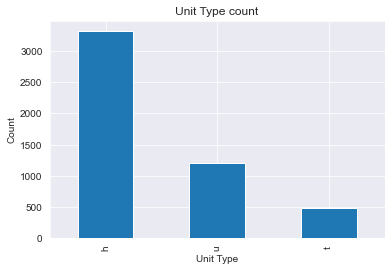

In [66]:
# property types

df_new['Type'].value_counts().plot(kind='bar')
plt.title('Unit Type count')
plt.xlabel('Unit Type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

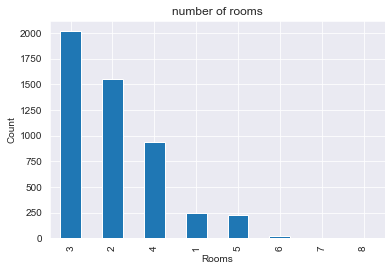

In [67]:
df_new['Rooms'].value_counts().plot(kind='bar')
plt.title('number of rooms')
plt.xlabel('Rooms')
plt.ylabel('Count')

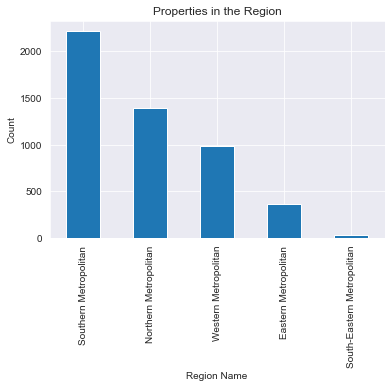

In [68]:
df_new['Regionname'].value_counts().plot(kind='bar')
plt.title('Properties in the Region')
plt.xlabel('Region Name')
plt.ylabel('Count')
plt.show()

From the above graphs, the following conclusions can be drawn for the Melbourne Housing Market:

1. Majority of the properties are houses.
2. Properties are concentrated towards 3, 2 and 4 rooms.
3. Geographic concentration of the properties is in Metroplitan areas specifically: Southern, Northern and Western

Text(0, 0.5, 'Median Price')

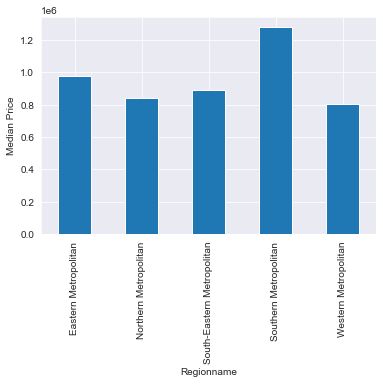

In [70]:
# median price by region. Median is selected since we are aware of outliers in price from the above graphs
df_new.groupby(['Regionname'])['Price'].median().plot(kind='bar')
plt.ylabel('Median Price')

Text(0, 0.5, 'Median Price')

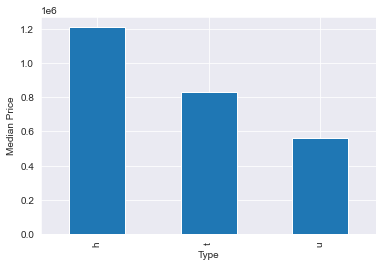

In [71]:
# median price by region
df_new.groupby(['Type'])['Price'].median().plot(kind='bar')
plt.ylabel('Median Price')

# median price across different types

Text(0, 0.5, 'Median Price')

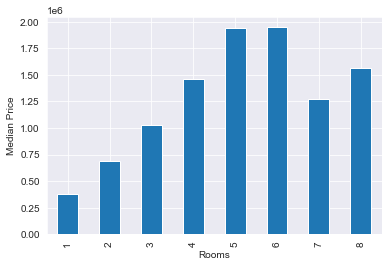

In [72]:
df_new.groupby(['Rooms'])['Price'].median().plot(kind='bar')
plt.ylabel('Median Price')

The median price conclusions we gather from the above graphs are as follows. We selected the median price due to the existence of outliers.

  1. The Median price in the Southern Metropolitan area is the highest with more than AUD 1.2 Mn median price followed by   
  Eastern Metropolitan at approximately AUD 1 Mn.
  2. Houses have the highest median price at AUD 1 million
  3. 3,2 and 4 rooms properties have median prices at approx AUD 1M, AUD 700k and AUD 1.4 M

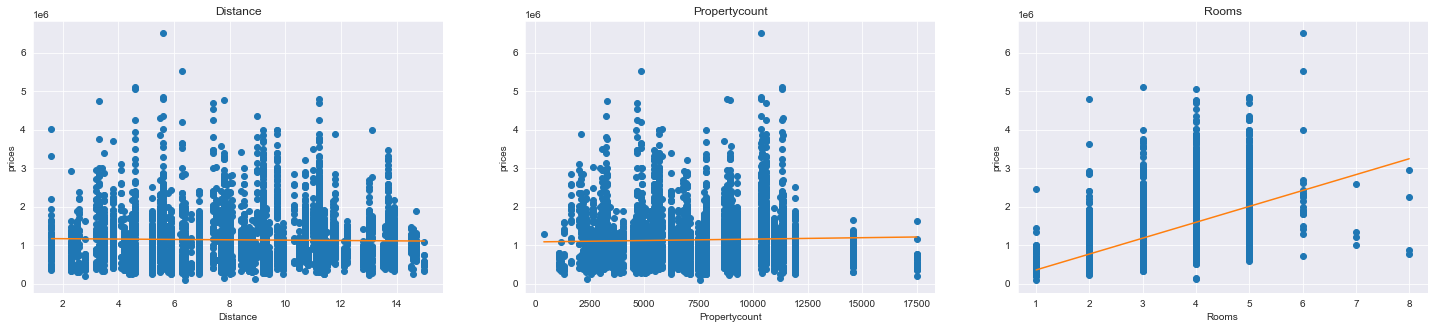

In [77]:
plt.figure(figsize=(25, 5))

columns = {'Rooms','Propertycount','Distance'}

for i, col in enumerate(columns):

    plt.subplot(1, 3, i+1)
    x = df_new[col]
    y = df_new['Price']
    plt.plot(x, y,'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

With so many independent variables it is complicated to see the relationships of all the independent variables with the dependent variable. We can check this assumption through a scatter plot of the residuals. For now, we can check the relationship of a few independent variables with price.

## 3. Model Building & Hyperparameter Tuning

In [90]:
df_encoded = pd.get_dummies(df_new.drop('Price',axis=1), drop_first=True)

In [91]:
df_encoded.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,...,CouncilArea_Moonee Valley,CouncilArea_Moreland,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Whitehorse,CouncilArea_Yarra,Regionname_Northern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan
0,2,2.5,3067.0,2.0,1.0,1.0,202.0,-37.7996,144.9984,4019.0,...,0,0,0,0,0,1,1,0,0,0
1,2,2.5,3067.0,2.0,1.0,0.0,156.0,-37.8079,144.9934,4019.0,...,0,0,0,0,0,1,1,0,0,0
2,3,2.5,3067.0,3.0,2.0,0.0,134.0,-37.8093,144.9944,4019.0,...,0,0,0,0,0,1,1,0,0,0
3,3,2.5,3067.0,3.0,2.0,1.0,94.0,-37.7969,144.9969,4019.0,...,0,0,0,0,0,1,1,0,0,0
4,4,2.5,3067.0,3.0,1.0,2.0,120.0,-37.8072,144.9941,4019.0,...,0,0,0,0,0,1,1,0,0,0


### Train Split Data

In [95]:
# Preparing Data and Target dataframe
data = df_new.drop(columns=['Price', 'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date','CouncilArea','Regionname'])
data = pd.get_dummies(data, drop_first=True)
target = df_new['Price']

# Data splitting for Train, Validation and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

#_____ Checking shape ____
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3500, 10) (3500,)
(1500, 10) (1500,)


### 3.1 CAT Boost Regression

In [104]:
model_CATB = CatBoostRegressor()
model_CATB.fit(X_train, y_train)

yhat_pred_CATB = model_CATB.predict(X_test)

cross_val_CATB = round(np.mean(cross_val_score(model_CATB,X_train,y_train)),4)
R2_CATB = round(r2_score(y_test, yhat_pred_CATB),4)
MAE_CATB = int(mean_absolute_error(y_test,yhat_pred_CATB))

Learning rate set to 0.04878
0:	learn: 657796.0731116	total: 145ms	remaining: 2m 24s
1:	learn: 640870.3402211	total: 147ms	remaining: 1m 13s
2:	learn: 626149.1619253	total: 149ms	remaining: 49.7s
3:	learn: 611614.3571395	total: 152ms	remaining: 37.8s
4:	learn: 597016.1613308	total: 154ms	remaining: 30.7s
5:	learn: 583319.8154828	total: 156ms	remaining: 25.9s
6:	learn: 569780.9264816	total: 159ms	remaining: 22.5s
7:	learn: 558397.2404065	total: 161ms	remaining: 19.9s
8:	learn: 547364.2419551	total: 163ms	remaining: 18s
9:	learn: 535953.4283185	total: 165ms	remaining: 16.4s
10:	learn: 524907.0932827	total: 168ms	remaining: 15.1s
11:	learn: 514811.4545864	total: 171ms	remaining: 14s
12:	learn: 504812.5439194	total: 173ms	remaining: 13.2s
13:	learn: 496247.6711269	total: 177ms	remaining: 12.4s
14:	learn: 488943.1051813	total: 179ms	remaining: 11.8s
15:	learn: 480935.4977376	total: 182ms	remaining: 11.2s
16:	learn: 472882.4121011	total: 184ms	remaining: 10.7s
17:	learn: 465190.6992843	total

193:	learn: 266145.7887249	total: 644ms	remaining: 2.67s
194:	learn: 265736.5607983	total: 646ms	remaining: 2.67s
195:	learn: 265414.9867552	total: 649ms	remaining: 2.66s
196:	learn: 264981.8886969	total: 652ms	remaining: 2.66s
197:	learn: 264731.5145734	total: 654ms	remaining: 2.65s
198:	learn: 264315.5814262	total: 657ms	remaining: 2.64s
199:	learn: 263976.0730981	total: 659ms	remaining: 2.64s
200:	learn: 263592.2226824	total: 662ms	remaining: 2.63s
201:	learn: 263508.0061354	total: 664ms	remaining: 2.62s
202:	learn: 263265.3121387	total: 667ms	remaining: 2.62s
203:	learn: 263000.7544020	total: 670ms	remaining: 2.61s
204:	learn: 262658.8036561	total: 672ms	remaining: 2.61s
205:	learn: 262308.0720280	total: 675ms	remaining: 2.6s
206:	learn: 261765.4148124	total: 678ms	remaining: 2.6s
207:	learn: 261486.6672992	total: 680ms	remaining: 2.59s
208:	learn: 261221.7073547	total: 682ms	remaining: 2.58s
209:	learn: 260867.6730511	total: 685ms	remaining: 2.58s
210:	learn: 260606.1821816	total:

358:	learn: 228107.2069775	total: 1.12s	remaining: 2s
359:	learn: 227868.5128814	total: 1.12s	remaining: 1.99s
360:	learn: 227690.3984694	total: 1.12s	remaining: 1.99s
361:	learn: 227563.0288366	total: 1.13s	remaining: 1.99s
362:	learn: 227493.0821910	total: 1.13s	remaining: 1.98s
363:	learn: 227485.6863715	total: 1.13s	remaining: 1.98s
364:	learn: 227372.2070768	total: 1.14s	remaining: 1.98s
365:	learn: 227203.8400341	total: 1.14s	remaining: 1.97s
366:	learn: 227060.1524948	total: 1.14s	remaining: 1.97s
367:	learn: 226850.3273129	total: 1.14s	remaining: 1.96s
368:	learn: 226635.7083965	total: 1.15s	remaining: 1.96s
369:	learn: 226485.5311484	total: 1.15s	remaining: 1.96s
370:	learn: 226403.7538068	total: 1.16s	remaining: 1.96s
371:	learn: 226274.2106708	total: 1.16s	remaining: 1.96s
372:	learn: 226184.7722788	total: 1.16s	remaining: 1.95s
373:	learn: 226062.0889933	total: 1.17s	remaining: 1.95s
374:	learn: 225910.6522200	total: 1.17s	remaining: 1.95s
375:	learn: 225765.4286999	total: 

512:	learn: 209782.9581659	total: 1.59s	remaining: 1.51s
513:	learn: 209638.1025550	total: 1.6s	remaining: 1.51s
514:	learn: 209550.7408899	total: 1.6s	remaining: 1.51s
515:	learn: 209393.3114328	total: 1.6s	remaining: 1.5s
516:	learn: 209319.5765573	total: 1.61s	remaining: 1.5s
517:	learn: 209281.0213689	total: 1.61s	remaining: 1.5s
518:	learn: 209110.2029811	total: 1.61s	remaining: 1.5s
519:	learn: 208993.6296683	total: 1.62s	remaining: 1.49s
520:	learn: 208934.9921557	total: 1.62s	remaining: 1.49s
521:	learn: 208889.4240822	total: 1.62s	remaining: 1.49s
522:	learn: 208755.2177649	total: 1.63s	remaining: 1.48s
523:	learn: 208556.7352680	total: 1.63s	remaining: 1.48s
524:	learn: 208513.5186278	total: 1.64s	remaining: 1.48s
525:	learn: 208461.4556452	total: 1.64s	remaining: 1.48s
526:	learn: 208229.0129491	total: 1.64s	remaining: 1.47s
527:	learn: 208070.0893514	total: 1.64s	remaining: 1.47s
528:	learn: 208016.4797885	total: 1.65s	remaining: 1.47s
529:	learn: 207867.5621948	total: 1.65

673:	learn: 194474.5594714	total: 2.07s	remaining: 1s
674:	learn: 194466.6089698	total: 2.08s	remaining: 1s
675:	learn: 194389.6966148	total: 2.08s	remaining: 997ms
676:	learn: 194376.2817423	total: 2.08s	remaining: 994ms
677:	learn: 194240.5141952	total: 2.08s	remaining: 990ms
678:	learn: 194143.2145714	total: 2.09s	remaining: 987ms
679:	learn: 194083.5413466	total: 2.09s	remaining: 985ms
680:	learn: 194034.9275162	total: 2.1s	remaining: 982ms
681:	learn: 193941.8226004	total: 2.1s	remaining: 979ms
682:	learn: 193854.6928052	total: 2.1s	remaining: 976ms
683:	learn: 193839.7492845	total: 2.1s	remaining: 973ms
684:	learn: 193829.9812167	total: 2.11s	remaining: 969ms
685:	learn: 193746.6532251	total: 2.11s	remaining: 966ms
686:	learn: 193659.4055561	total: 2.11s	remaining: 963ms
687:	learn: 193528.1422432	total: 2.12s	remaining: 959ms
688:	learn: 193454.7951187	total: 2.12s	remaining: 956ms
689:	learn: 193287.2931196	total: 2.12s	remaining: 953ms
690:	learn: 193183.7672457	total: 2.12s	r

837:	learn: 184187.1238770	total: 2.55s	remaining: 492ms
838:	learn: 184130.9273238	total: 2.55s	remaining: 489ms
839:	learn: 184088.8548118	total: 2.55s	remaining: 486ms
840:	learn: 183998.4815776	total: 2.56s	remaining: 483ms
841:	learn: 183959.7094838	total: 2.56s	remaining: 480ms
842:	learn: 183899.6216060	total: 2.56s	remaining: 477ms
843:	learn: 183854.7830284	total: 2.56s	remaining: 474ms
844:	learn: 183754.9125756	total: 2.57s	remaining: 471ms
845:	learn: 183634.5442521	total: 2.57s	remaining: 468ms
846:	learn: 183568.0259276	total: 2.57s	remaining: 465ms
847:	learn: 183495.7741497	total: 2.58s	remaining: 462ms
848:	learn: 183432.9557113	total: 2.58s	remaining: 459ms
849:	learn: 183353.7023130	total: 2.58s	remaining: 456ms
850:	learn: 183237.9726624	total: 2.6s	remaining: 456ms
851:	learn: 183188.0930353	total: 2.6s	remaining: 452ms
852:	learn: 183142.6219295	total: 2.61s	remaining: 449ms
853:	learn: 183047.3819409	total: 2.61s	remaining: 446ms
854:	learn: 183010.4071963	total:

981:	learn: 175535.6611725	total: 3.03s	remaining: 55.6ms
982:	learn: 175509.3775873	total: 3.04s	remaining: 52.6ms
983:	learn: 175434.2485522	total: 3.05s	remaining: 49.5ms
984:	learn: 175421.5322045	total: 3.05s	remaining: 46.4ms
985:	learn: 175362.5333042	total: 3.05s	remaining: 43.3ms
986:	learn: 175341.0240551	total: 3.06s	remaining: 40.3ms
987:	learn: 175340.1215485	total: 3.06s	remaining: 37.2ms
988:	learn: 175244.9598500	total: 3.06s	remaining: 34.1ms
989:	learn: 175227.4298366	total: 3.06s	remaining: 31ms
990:	learn: 175209.7313368	total: 3.07s	remaining: 27.9ms
991:	learn: 175190.9139571	total: 3.07s	remaining: 24.8ms
992:	learn: 175127.6754387	total: 3.07s	remaining: 21.7ms
993:	learn: 175090.1768080	total: 3.08s	remaining: 18.6ms
994:	learn: 174999.5394142	total: 3.08s	remaining: 15.5ms
995:	learn: 174998.2912059	total: 3.08s	remaining: 12.4ms
996:	learn: 174974.1646795	total: 3.08s	remaining: 9.28ms
997:	learn: 174929.2870993	total: 3.09s	remaining: 6.19ms
998:	learn: 1748

169:	learn: 271266.5095559	total: 493ms	remaining: 2.41s
170:	learn: 271099.4319024	total: 497ms	remaining: 2.41s
171:	learn: 270904.2456766	total: 500ms	remaining: 2.4s
172:	learn: 270512.9038445	total: 517ms	remaining: 2.47s
173:	learn: 270182.7276667	total: 519ms	remaining: 2.46s
174:	learn: 269838.4494628	total: 522ms	remaining: 2.46s
175:	learn: 269380.2455167	total: 524ms	remaining: 2.45s
176:	learn: 269235.7041873	total: 527ms	remaining: 2.45s
177:	learn: 268792.5021182	total: 530ms	remaining: 2.44s
178:	learn: 268311.3959750	total: 533ms	remaining: 2.44s
179:	learn: 267825.0812156	total: 535ms	remaining: 2.44s
180:	learn: 267609.1818198	total: 538ms	remaining: 2.43s
181:	learn: 267281.1309818	total: 541ms	remaining: 2.43s
182:	learn: 267039.5358221	total: 543ms	remaining: 2.43s
183:	learn: 266853.3815851	total: 546ms	remaining: 2.42s
184:	learn: 266462.0260788	total: 549ms	remaining: 2.42s
185:	learn: 266161.1143682	total: 552ms	remaining: 2.41s
186:	learn: 265799.4427344	total

333:	learn: 229173.0702807	total: 963ms	remaining: 1.92s
334:	learn: 229092.2151702	total: 965ms	remaining: 1.92s
335:	learn: 228979.2469899	total: 968ms	remaining: 1.91s
336:	learn: 228843.4370792	total: 970ms	remaining: 1.91s
337:	learn: 228705.3731395	total: 972ms	remaining: 1.9s
338:	learn: 228483.2860164	total: 975ms	remaining: 1.9s
339:	learn: 228244.9821865	total: 977ms	remaining: 1.9s
340:	learn: 228105.9947115	total: 980ms	remaining: 1.89s
341:	learn: 227806.9754138	total: 982ms	remaining: 1.89s
342:	learn: 227685.0493454	total: 984ms	remaining: 1.89s
343:	learn: 227472.3443282	total: 987ms	remaining: 1.88s
344:	learn: 227368.3113784	total: 989ms	remaining: 1.88s
345:	learn: 227245.0928801	total: 992ms	remaining: 1.87s
346:	learn: 227059.9912771	total: 994ms	remaining: 1.87s
347:	learn: 226936.1964893	total: 997ms	remaining: 1.87s
348:	learn: 226761.5511032	total: 999ms	remaining: 1.86s
349:	learn: 226578.7301282	total: 1s	remaining: 1.86s
350:	learn: 226324.9565529	total: 1s	

500:	learn: 203859.0658962	total: 1.44s	remaining: 1.43s
501:	learn: 203686.5050802	total: 1.44s	remaining: 1.43s
502:	learn: 203472.6111457	total: 1.44s	remaining: 1.43s
503:	learn: 203466.0300643	total: 1.45s	remaining: 1.42s
504:	learn: 203171.4243823	total: 1.45s	remaining: 1.42s
505:	learn: 202926.0479203	total: 1.45s	remaining: 1.42s
506:	learn: 202881.9488432	total: 1.45s	remaining: 1.41s
507:	learn: 202719.7333792	total: 1.46s	remaining: 1.41s
508:	learn: 202535.6419893	total: 1.46s	remaining: 1.41s
509:	learn: 202278.6730115	total: 1.46s	remaining: 1.41s
510:	learn: 202126.3556791	total: 1.47s	remaining: 1.4s
511:	learn: 202102.7795572	total: 1.47s	remaining: 1.4s
512:	learn: 201985.6352944	total: 1.47s	remaining: 1.4s
513:	learn: 201856.5626022	total: 1.48s	remaining: 1.4s
514:	learn: 201781.2366248	total: 1.48s	remaining: 1.39s
515:	learn: 201667.3126201	total: 1.48s	remaining: 1.39s
516:	learn: 201494.6042014	total: 1.48s	remaining: 1.39s
517:	learn: 201473.8710548	total: 1

680:	learn: 185911.4461773	total: 1.92s	remaining: 901ms
681:	learn: 185789.6028144	total: 1.93s	remaining: 898ms
682:	learn: 185696.7696938	total: 1.93s	remaining: 895ms
683:	learn: 185644.3543415	total: 1.93s	remaining: 892ms
684:	learn: 185551.1352123	total: 1.93s	remaining: 889ms
685:	learn: 185458.7275944	total: 1.93s	remaining: 886ms
686:	learn: 185348.9652208	total: 1.94s	remaining: 882ms
687:	learn: 185270.4966984	total: 1.94s	remaining: 879ms
688:	learn: 185266.6615558	total: 1.94s	remaining: 876ms
689:	learn: 185182.1328646	total: 1.94s	remaining: 873ms
690:	learn: 185124.1413113	total: 1.95s	remaining: 870ms
691:	learn: 185063.3793426	total: 1.95s	remaining: 867ms
692:	learn: 185053.3678584	total: 1.95s	remaining: 865ms
693:	learn: 184943.3308663	total: 1.95s	remaining: 862ms
694:	learn: 184861.9292247	total: 1.96s	remaining: 859ms
695:	learn: 184857.8883461	total: 1.96s	remaining: 856ms
696:	learn: 184761.5605356	total: 1.96s	remaining: 853ms
697:	learn: 184626.0928439	tota

864:	learn: 172601.1898670	total: 2.38s	remaining: 372ms
865:	learn: 172555.2015640	total: 2.39s	remaining: 369ms
866:	learn: 172429.2022637	total: 2.39s	remaining: 367ms
867:	learn: 172414.7101863	total: 2.39s	remaining: 364ms
868:	learn: 172406.9601444	total: 2.4s	remaining: 361ms
869:	learn: 172323.7920256	total: 2.4s	remaining: 358ms
870:	learn: 172262.9893788	total: 2.4s	remaining: 355ms
871:	learn: 172185.9823274	total: 2.4s	remaining: 353ms
872:	learn: 172170.9258089	total: 2.4s	remaining: 350ms
873:	learn: 172076.7209476	total: 2.41s	remaining: 347ms
874:	learn: 172033.0278851	total: 2.41s	remaining: 344ms
875:	learn: 171976.0334369	total: 2.41s	remaining: 342ms
876:	learn: 171915.7307787	total: 2.42s	remaining: 339ms
877:	learn: 171842.4791490	total: 2.42s	remaining: 336ms
878:	learn: 171792.5901429	total: 2.42s	remaining: 333ms
879:	learn: 171790.1376630	total: 2.42s	remaining: 330ms
880:	learn: 171744.8511679	total: 2.43s	remaining: 328ms
881:	learn: 171642.7661512	total: 2.

32:	learn: 397279.6676945	total: 72.6ms	remaining: 2.13s
33:	learn: 394357.4924830	total: 75ms	remaining: 2.13s
34:	learn: 391078.6762343	total: 77.4ms	remaining: 2.13s
35:	learn: 388190.0646641	total: 79.8ms	remaining: 2.14s
36:	learn: 385513.3339476	total: 82.4ms	remaining: 2.14s
37:	learn: 382859.1414903	total: 84.9ms	remaining: 2.15s
38:	learn: 380619.3727533	total: 87.5ms	remaining: 2.15s
39:	learn: 377653.1296347	total: 90.1ms	remaining: 2.16s
40:	learn: 374997.5146434	total: 92.7ms	remaining: 2.17s
41:	learn: 371438.9536153	total: 95.3ms	remaining: 2.17s
42:	learn: 368956.5233272	total: 98.1ms	remaining: 2.18s
43:	learn: 366869.3119237	total: 101ms	remaining: 2.19s
44:	learn: 364799.9781924	total: 104ms	remaining: 2.2s
45:	learn: 362550.6023590	total: 107ms	remaining: 2.21s
46:	learn: 360017.6475307	total: 109ms	remaining: 2.21s
47:	learn: 357510.5688948	total: 112ms	remaining: 2.22s
48:	learn: 355607.9575578	total: 114ms	remaining: 2.22s
49:	learn: 353426.4386240	total: 117ms	r

227:	learn: 257826.7722762	total: 549ms	remaining: 1.86s
228:	learn: 257692.6573828	total: 551ms	remaining: 1.85s
229:	learn: 257273.4176583	total: 553ms	remaining: 1.85s
230:	learn: 256761.3800345	total: 556ms	remaining: 1.85s
231:	learn: 256379.9675063	total: 558ms	remaining: 1.85s
232:	learn: 256365.9615512	total: 560ms	remaining: 1.84s
233:	learn: 256048.2071273	total: 562ms	remaining: 1.84s
234:	learn: 255659.1604083	total: 564ms	remaining: 1.84s
235:	learn: 255197.3478281	total: 567ms	remaining: 1.83s
236:	learn: 254727.9274624	total: 569ms	remaining: 1.83s
237:	learn: 254415.0624464	total: 572ms	remaining: 1.83s
238:	learn: 254212.2848348	total: 575ms	remaining: 1.83s
239:	learn: 253822.0456485	total: 578ms	remaining: 1.83s
240:	learn: 253808.5892847	total: 581ms	remaining: 1.83s
241:	learn: 253460.8423810	total: 584ms	remaining: 1.83s
242:	learn: 253279.1980645	total: 587ms	remaining: 1.83s
243:	learn: 252984.4440536	total: 590ms	remaining: 1.83s
244:	learn: 252628.5050330	tota

397:	learn: 227251.3600212	total: 1.02s	remaining: 1.55s
398:	learn: 227179.1121809	total: 1.02s	remaining: 1.54s
399:	learn: 226892.0266242	total: 1.03s	remaining: 1.54s
400:	learn: 226768.4103161	total: 1.03s	remaining: 1.54s
401:	learn: 226485.7682244	total: 1.03s	remaining: 1.54s
402:	learn: 226280.9776006	total: 1.04s	remaining: 1.54s
403:	learn: 226209.9537820	total: 1.04s	remaining: 1.53s
404:	learn: 226015.9089299	total: 1.04s	remaining: 1.53s
405:	learn: 225750.2102479	total: 1.04s	remaining: 1.53s
406:	learn: 225574.2757257	total: 1.05s	remaining: 1.52s
407:	learn: 225388.7633469	total: 1.05s	remaining: 1.52s
408:	learn: 225140.9386098	total: 1.05s	remaining: 1.52s
409:	learn: 225060.3809568	total: 1.05s	remaining: 1.52s
410:	learn: 224918.8683289	total: 1.06s	remaining: 1.51s
411:	learn: 224751.0396456	total: 1.06s	remaining: 1.51s
412:	learn: 224598.0149995	total: 1.06s	remaining: 1.51s
413:	learn: 224293.4094162	total: 1.07s	remaining: 1.51s
414:	learn: 224042.7980881	tota

578:	learn: 201780.7456413	total: 1.49s	remaining: 1.08s
579:	learn: 201624.8447523	total: 1.49s	remaining: 1.08s
580:	learn: 201550.2597412	total: 1.5s	remaining: 1.08s
581:	learn: 201347.1780205	total: 1.5s	remaining: 1.08s
582:	learn: 201291.1624129	total: 1.5s	remaining: 1.07s
583:	learn: 201061.5345674	total: 1.5s	remaining: 1.07s
584:	learn: 200930.3388424	total: 1.51s	remaining: 1.07s
585:	learn: 200742.2854649	total: 1.51s	remaining: 1.07s
586:	learn: 200630.6672896	total: 1.51s	remaining: 1.06s
587:	learn: 200486.9242427	total: 1.51s	remaining: 1.06s
588:	learn: 200359.1488025	total: 1.52s	remaining: 1.06s
589:	learn: 200242.9224816	total: 1.52s	remaining: 1.05s
590:	learn: 200179.8588649	total: 1.52s	remaining: 1.05s
591:	learn: 200016.4620637	total: 1.52s	remaining: 1.05s
592:	learn: 199887.4553406	total: 1.53s	remaining: 1.05s
593:	learn: 199695.5572869	total: 1.53s	remaining: 1.04s
594:	learn: 199490.4086121	total: 1.53s	remaining: 1.04s
595:	learn: 199366.8717697	total: 1

778:	learn: 182024.6723272	total: 1.97s	remaining: 558ms
779:	learn: 181932.9042659	total: 1.97s	remaining: 556ms
780:	learn: 181812.3337540	total: 1.97s	remaining: 553ms
781:	learn: 181731.6567377	total: 1.98s	remaining: 551ms
782:	learn: 181664.4205292	total: 1.98s	remaining: 548ms
783:	learn: 181604.2084525	total: 1.98s	remaining: 546ms
784:	learn: 181526.1149905	total: 1.98s	remaining: 543ms
785:	learn: 181465.5970239	total: 1.99s	remaining: 541ms
786:	learn: 181410.0595918	total: 1.99s	remaining: 538ms
787:	learn: 181336.0549383	total: 1.99s	remaining: 535ms
788:	learn: 181286.3991763	total: 1.99s	remaining: 533ms
789:	learn: 181239.3213436	total: 2s	remaining: 530ms
790:	learn: 181176.2211194	total: 2s	remaining: 528ms
791:	learn: 181100.0024474	total: 2s	remaining: 525ms
792:	learn: 181039.5926786	total: 2s	remaining: 523ms
793:	learn: 181034.5988389	total: 2s	remaining: 520ms
794:	learn: 180950.7900929	total: 2.01s	remaining: 518ms
795:	learn: 180862.9195452	total: 2.01s	remain

968:	learn: 168083.1697789	total: 2.44s	remaining: 78.2ms
969:	learn: 168017.1254079	total: 2.45s	remaining: 75.7ms
970:	learn: 167986.8393597	total: 2.45s	remaining: 73.1ms
971:	learn: 167933.0213878	total: 2.45s	remaining: 70.6ms
972:	learn: 167853.2168577	total: 2.45s	remaining: 68.1ms
973:	learn: 167798.6132116	total: 2.46s	remaining: 65.6ms
974:	learn: 167746.4788364	total: 2.46s	remaining: 63ms
975:	learn: 167698.0285170	total: 2.46s	remaining: 60.5ms
976:	learn: 167661.5203498	total: 2.46s	remaining: 58ms
977:	learn: 167587.4879244	total: 2.47s	remaining: 55.5ms
978:	learn: 167516.9768135	total: 2.47s	remaining: 53ms
979:	learn: 167428.7113449	total: 2.47s	remaining: 50.5ms
980:	learn: 167383.7801313	total: 2.48s	remaining: 48ms
981:	learn: 167352.9245552	total: 2.48s	remaining: 45.4ms
982:	learn: 167273.6195189	total: 2.48s	remaining: 42.9ms
983:	learn: 167212.5415942	total: 2.48s	remaining: 40.4ms
984:	learn: 167077.0195787	total: 2.49s	remaining: 37.9ms
985:	learn: 166998.184

137:	learn: 282639.6139463	total: 338ms	remaining: 2.11s
138:	learn: 282293.2321215	total: 341ms	remaining: 2.11s
139:	learn: 281914.2536063	total: 343ms	remaining: 2.11s
140:	learn: 281571.2194007	total: 345ms	remaining: 2.1s
141:	learn: 280815.9796465	total: 348ms	remaining: 2.1s
142:	learn: 280402.9884043	total: 350ms	remaining: 2.1s
143:	learn: 279938.3924849	total: 353ms	remaining: 2.1s
144:	learn: 279301.0824233	total: 356ms	remaining: 2.1s
145:	learn: 279041.4720108	total: 359ms	remaining: 2.1s
146:	learn: 278422.6010945	total: 363ms	remaining: 2.1s
147:	learn: 277844.1644073	total: 366ms	remaining: 2.1s
148:	learn: 277448.6143326	total: 369ms	remaining: 2.11s
149:	learn: 276708.3597511	total: 372ms	remaining: 2.11s
150:	learn: 276460.6332519	total: 375ms	remaining: 2.11s
151:	learn: 275946.4684765	total: 378ms	remaining: 2.11s
152:	learn: 275746.3776109	total: 380ms	remaining: 2.1s
153:	learn: 275364.2800211	total: 383ms	remaining: 2.1s
154:	learn: 275117.0844918	total: 385ms	r

317:	learn: 229876.0687169	total: 812ms	remaining: 1.74s
318:	learn: 229636.9432683	total: 814ms	remaining: 1.74s
319:	learn: 229389.9372587	total: 816ms	remaining: 1.73s
320:	learn: 229383.2257099	total: 818ms	remaining: 1.73s
321:	learn: 229151.2848272	total: 820ms	remaining: 1.73s
322:	learn: 228939.8627564	total: 823ms	remaining: 1.72s
323:	learn: 228833.5086451	total: 825ms	remaining: 1.72s
324:	learn: 228715.1121196	total: 828ms	remaining: 1.72s
325:	learn: 228379.8296640	total: 830ms	remaining: 1.72s
326:	learn: 228370.7366053	total: 833ms	remaining: 1.71s
327:	learn: 228126.3898874	total: 836ms	remaining: 1.71s
328:	learn: 228118.3748149	total: 838ms	remaining: 1.71s
329:	learn: 227954.5825484	total: 841ms	remaining: 1.71s
330:	learn: 227945.9528088	total: 844ms	remaining: 1.71s
331:	learn: 227784.9132738	total: 847ms	remaining: 1.7s
332:	learn: 227778.7420928	total: 850ms	remaining: 1.7s
333:	learn: 227606.0226152	total: 853ms	remaining: 1.7s
334:	learn: 227402.7355250	total: 

503:	learn: 206147.6737382	total: 1.28s	remaining: 1.26s
504:	learn: 206010.1011594	total: 1.29s	remaining: 1.26s
505:	learn: 205940.4664634	total: 1.29s	remaining: 1.26s
506:	learn: 205767.6386955	total: 1.29s	remaining: 1.26s
507:	learn: 205645.4976047	total: 1.3s	remaining: 1.26s
508:	learn: 205556.3985458	total: 1.3s	remaining: 1.25s
509:	learn: 205486.8934165	total: 1.3s	remaining: 1.25s
510:	learn: 205391.8681729	total: 1.3s	remaining: 1.25s
511:	learn: 205270.2265769	total: 1.31s	remaining: 1.25s
512:	learn: 205190.9012752	total: 1.31s	remaining: 1.24s
513:	learn: 205046.8879910	total: 1.31s	remaining: 1.24s
514:	learn: 204964.2397394	total: 1.31s	remaining: 1.24s
515:	learn: 204846.4576946	total: 1.32s	remaining: 1.24s
516:	learn: 204832.6945702	total: 1.32s	remaining: 1.23s
517:	learn: 204830.6684153	total: 1.32s	remaining: 1.23s
518:	learn: 204706.2555538	total: 1.33s	remaining: 1.23s
519:	learn: 204586.3834353	total: 1.33s	remaining: 1.23s
520:	learn: 204489.1889904	total: 1

686:	learn: 188238.6905543	total: 1.76s	remaining: 802ms
687:	learn: 188188.8806928	total: 1.76s	remaining: 800ms
688:	learn: 188135.0238178	total: 1.76s	remaining: 797ms
689:	learn: 187955.6293028	total: 1.77s	remaining: 794ms
690:	learn: 187820.9202484	total: 1.77s	remaining: 792ms
691:	learn: 187705.5414070	total: 1.77s	remaining: 789ms
692:	learn: 187659.3015670	total: 1.77s	remaining: 787ms
693:	learn: 187529.9472684	total: 1.78s	remaining: 784ms
694:	learn: 187477.8657594	total: 1.78s	remaining: 781ms
695:	learn: 187389.0420232	total: 1.78s	remaining: 779ms
696:	learn: 187351.4926022	total: 1.78s	remaining: 776ms
697:	learn: 187280.0386620	total: 1.79s	remaining: 774ms
698:	learn: 187273.0500508	total: 1.79s	remaining: 772ms
699:	learn: 187217.3523373	total: 1.79s	remaining: 769ms
700:	learn: 187142.2141025	total: 1.8s	remaining: 767ms
701:	learn: 186974.5387900	total: 1.8s	remaining: 764ms
702:	learn: 186788.6824950	total: 1.8s	remaining: 762ms
703:	learn: 186639.3426818	total: 

865:	learn: 174375.1677170	total: 2.23s	remaining: 346ms
866:	learn: 174324.1231852	total: 2.24s	remaining: 343ms
867:	learn: 174313.5712256	total: 2.24s	remaining: 341ms
868:	learn: 174215.7041052	total: 2.24s	remaining: 338ms
869:	learn: 174167.7329216	total: 2.24s	remaining: 335ms
870:	learn: 174074.4897827	total: 2.25s	remaining: 333ms
871:	learn: 174002.3235500	total: 2.25s	remaining: 330ms
872:	learn: 173945.1595731	total: 2.25s	remaining: 328ms
873:	learn: 173820.7451659	total: 2.25s	remaining: 325ms
874:	learn: 173740.0397954	total: 2.26s	remaining: 323ms
875:	learn: 173738.7186914	total: 2.26s	remaining: 320ms
876:	learn: 173621.4029935	total: 2.26s	remaining: 318ms
877:	learn: 173604.7793135	total: 2.27s	remaining: 315ms
878:	learn: 173562.6141135	total: 2.27s	remaining: 312ms
879:	learn: 173534.2739536	total: 2.27s	remaining: 310ms
880:	learn: 173498.2220292	total: 2.27s	remaining: 307ms
881:	learn: 173395.9135848	total: 2.28s	remaining: 305ms
882:	learn: 173290.5225483	tota

20:	learn: 463289.2472270	total: 56.8ms	remaining: 2.65s
21:	learn: 456362.9332352	total: 59.4ms	remaining: 2.64s
22:	learn: 449615.7619017	total: 62.1ms	remaining: 2.64s
23:	learn: 444209.3160559	total: 64.5ms	remaining: 2.62s
24:	learn: 439395.7055703	total: 67ms	remaining: 2.61s
25:	learn: 434588.3494030	total: 69.6ms	remaining: 2.61s
26:	learn: 429193.9669951	total: 72ms	remaining: 2.6s
27:	learn: 425302.2927413	total: 74.5ms	remaining: 2.58s
28:	learn: 420730.1666684	total: 77ms	remaining: 2.58s
29:	learn: 416594.2469788	total: 79.6ms	remaining: 2.57s
30:	learn: 411866.0738421	total: 82.4ms	remaining: 2.58s
31:	learn: 408596.2911913	total: 85.3ms	remaining: 2.58s
32:	learn: 405058.7444887	total: 88ms	remaining: 2.58s
33:	learn: 402167.9526588	total: 91ms	remaining: 2.58s
34:	learn: 398487.6980518	total: 94.4ms	remaining: 2.6s
35:	learn: 395508.5819491	total: 97.1ms	remaining: 2.6s
36:	learn: 392325.7312303	total: 99.8ms	remaining: 2.6s
37:	learn: 389385.4229028	total: 103ms	remain

197:	learn: 260671.1823056	total: 530ms	remaining: 2.15s
198:	learn: 260420.7983108	total: 533ms	remaining: 2.14s
199:	learn: 259977.0988368	total: 535ms	remaining: 2.14s
200:	learn: 259561.7213145	total: 538ms	remaining: 2.14s
201:	learn: 259273.3003795	total: 541ms	remaining: 2.13s
202:	learn: 258781.0129824	total: 543ms	remaining: 2.13s
203:	learn: 258437.4982185	total: 545ms	remaining: 2.13s
204:	learn: 258266.1951413	total: 548ms	remaining: 2.12s
205:	learn: 257863.9591358	total: 550ms	remaining: 2.12s
206:	learn: 257505.2880779	total: 553ms	remaining: 2.12s
207:	learn: 257160.3331520	total: 555ms	remaining: 2.11s
208:	learn: 257037.7615560	total: 559ms	remaining: 2.11s
209:	learn: 256843.2758112	total: 561ms	remaining: 2.11s
210:	learn: 256557.7725878	total: 564ms	remaining: 2.11s
211:	learn: 256386.0357271	total: 567ms	remaining: 2.11s
212:	learn: 256262.8297086	total: 570ms	remaining: 2.1s
213:	learn: 256058.2655342	total: 573ms	remaining: 2.1s
214:	learn: 255660.5217693	total:

372:	learn: 219002.0351527	total: 1s	remaining: 1.69s
373:	learn: 218882.1364104	total: 1.01s	remaining: 1.69s
374:	learn: 218687.6748699	total: 1.01s	remaining: 1.69s
375:	learn: 218558.7375429	total: 1.01s	remaining: 1.68s
376:	learn: 218353.2279450	total: 1.02s	remaining: 1.68s
377:	learn: 217963.8750825	total: 1.02s	remaining: 1.68s
378:	learn: 217665.0142676	total: 1.02s	remaining: 1.68s
379:	learn: 217631.3830325	total: 1.03s	remaining: 1.68s
380:	learn: 217448.6398113	total: 1.03s	remaining: 1.67s
381:	learn: 217288.0226176	total: 1.03s	remaining: 1.67s
382:	learn: 217269.9095470	total: 1.04s	remaining: 1.67s
383:	learn: 217238.4663856	total: 1.04s	remaining: 1.67s
384:	learn: 217097.8213319	total: 1.04s	remaining: 1.66s
385:	learn: 216935.6938407	total: 1.04s	remaining: 1.66s
386:	learn: 216754.1238984	total: 1.05s	remaining: 1.66s
387:	learn: 216597.7264032	total: 1.05s	remaining: 1.66s
388:	learn: 216399.2782915	total: 1.05s	remaining: 1.65s
389:	learn: 216284.9705383	total: 

541:	learn: 198641.1800926	total: 1.47s	remaining: 1.25s
542:	learn: 198493.9708626	total: 1.48s	remaining: 1.24s
543:	learn: 198367.4532627	total: 1.48s	remaining: 1.24s
544:	learn: 198358.9589261	total: 1.48s	remaining: 1.24s
545:	learn: 198223.0577800	total: 1.49s	remaining: 1.24s
546:	learn: 198120.0551818	total: 1.49s	remaining: 1.23s
547:	learn: 198029.8334297	total: 1.49s	remaining: 1.23s
548:	learn: 197886.2373816	total: 1.5s	remaining: 1.23s
549:	learn: 197759.4044299	total: 1.5s	remaining: 1.23s
550:	learn: 197696.5499493	total: 1.5s	remaining: 1.22s
551:	learn: 197690.8549579	total: 1.5s	remaining: 1.22s
552:	learn: 197436.2503056	total: 1.51s	remaining: 1.22s
553:	learn: 197415.3692831	total: 1.51s	remaining: 1.22s
554:	learn: 197399.0521596	total: 1.51s	remaining: 1.21s
555:	learn: 197217.3102293	total: 1.52s	remaining: 1.21s
556:	learn: 197214.6300157	total: 1.52s	remaining: 1.21s
557:	learn: 197055.8036843	total: 1.52s	remaining: 1.21s
558:	learn: 196900.9032114	total: 1

705:	learn: 183833.3315269	total: 1.95s	remaining: 811ms
706:	learn: 183708.8084084	total: 1.95s	remaining: 808ms
707:	learn: 183616.7503084	total: 1.95s	remaining: 805ms
708:	learn: 183522.6324493	total: 1.96s	remaining: 802ms
709:	learn: 183490.0521554	total: 1.96s	remaining: 799ms
710:	learn: 183480.6536097	total: 1.96s	remaining: 796ms
711:	learn: 183390.9183926	total: 1.96s	remaining: 794ms
712:	learn: 183281.3991447	total: 1.96s	remaining: 791ms
713:	learn: 183157.6414020	total: 1.97s	remaining: 788ms
714:	learn: 182989.3985502	total: 1.97s	remaining: 785ms
715:	learn: 182941.5673497	total: 1.97s	remaining: 782ms
716:	learn: 182817.5374482	total: 1.97s	remaining: 779ms
717:	learn: 182716.6780950	total: 1.98s	remaining: 776ms
718:	learn: 182623.8392410	total: 1.98s	remaining: 773ms
719:	learn: 182555.5201888	total: 1.98s	remaining: 771ms
720:	learn: 182547.4806878	total: 1.98s	remaining: 768ms
721:	learn: 182387.6963108	total: 1.99s	remaining: 765ms
722:	learn: 182312.3050479	tota

892:	learn: 170066.1744796	total: 2.42s	remaining: 290ms
893:	learn: 169963.1406059	total: 2.42s	remaining: 287ms
894:	learn: 169886.2129106	total: 2.42s	remaining: 284ms
895:	learn: 169793.5389346	total: 2.42s	remaining: 281ms
896:	learn: 169726.0577091	total: 2.43s	remaining: 279ms
897:	learn: 169664.4045962	total: 2.43s	remaining: 276ms
898:	learn: 169541.3839562	total: 2.43s	remaining: 273ms
899:	learn: 169423.9774562	total: 2.43s	remaining: 270ms
900:	learn: 169422.1081412	total: 2.43s	remaining: 268ms
901:	learn: 169331.9976388	total: 2.44s	remaining: 265ms
902:	learn: 169285.1304306	total: 2.44s	remaining: 262ms
903:	learn: 169181.2688545	total: 2.44s	remaining: 259ms
904:	learn: 169123.8122781	total: 2.44s	remaining: 257ms
905:	learn: 169050.5724414	total: 2.45s	remaining: 254ms
906:	learn: 168995.6211738	total: 2.45s	remaining: 251ms
907:	learn: 168914.8710182	total: 2.45s	remaining: 248ms
908:	learn: 168913.6222177	total: 2.45s	remaining: 246ms
909:	learn: 168866.3099545	tota

58:	learn: 339620.2974344	total: 156ms	remaining: 2.49s
59:	learn: 338437.9032538	total: 158ms	remaining: 2.48s
60:	learn: 337105.3295730	total: 161ms	remaining: 2.48s
61:	learn: 335672.3650024	total: 163ms	remaining: 2.47s
62:	learn: 334330.8505541	total: 166ms	remaining: 2.46s
63:	learn: 333224.0299301	total: 168ms	remaining: 2.46s
64:	learn: 331908.3241879	total: 171ms	remaining: 2.46s
65:	learn: 330683.6707524	total: 174ms	remaining: 2.46s
66:	learn: 329276.0770027	total: 176ms	remaining: 2.45s
67:	learn: 328400.2847122	total: 179ms	remaining: 2.45s
68:	learn: 327103.0547736	total: 181ms	remaining: 2.44s
69:	learn: 326271.8929132	total: 184ms	remaining: 2.44s
70:	learn: 325228.4613570	total: 186ms	remaining: 2.43s
71:	learn: 324376.6186988	total: 188ms	remaining: 2.43s
72:	learn: 323642.9592705	total: 191ms	remaining: 2.42s
73:	learn: 322608.1173491	total: 193ms	remaining: 2.42s
74:	learn: 321615.3006618	total: 196ms	remaining: 2.41s
75:	learn: 320302.4959992	total: 198ms	remaining

249:	learn: 253694.0755617	total: 626ms	remaining: 1.88s
250:	learn: 253350.3688636	total: 630ms	remaining: 1.88s
251:	learn: 253297.0041342	total: 632ms	remaining: 1.88s
252:	learn: 253226.4239104	total: 635ms	remaining: 1.87s
253:	learn: 252874.9017053	total: 637ms	remaining: 1.87s
254:	learn: 252544.2689857	total: 640ms	remaining: 1.87s
255:	learn: 252495.8556772	total: 642ms	remaining: 1.86s
256:	learn: 252174.8273874	total: 644ms	remaining: 1.86s
257:	learn: 252152.6685945	total: 647ms	remaining: 1.86s
258:	learn: 251855.2363295	total: 650ms	remaining: 1.86s
259:	learn: 251818.0231144	total: 652ms	remaining: 1.85s
260:	learn: 251543.6210430	total: 654ms	remaining: 1.85s
261:	learn: 251214.6956988	total: 657ms	remaining: 1.85s
262:	learn: 250941.0580601	total: 659ms	remaining: 1.85s
263:	learn: 250917.9638508	total: 661ms	remaining: 1.84s
264:	learn: 250900.2821978	total: 664ms	remaining: 1.84s
265:	learn: 250737.4249750	total: 667ms	remaining: 1.84s
266:	learn: 250702.9583128	tota

425:	learn: 218824.4322144	total: 1.1s	remaining: 1.48s
426:	learn: 218685.6872114	total: 1.1s	remaining: 1.48s
427:	learn: 218515.0551876	total: 1.1s	remaining: 1.48s
428:	learn: 218381.2253514	total: 1.11s	remaining: 1.48s
429:	learn: 218176.2400411	total: 1.11s	remaining: 1.47s
430:	learn: 218051.4491543	total: 1.11s	remaining: 1.47s
431:	learn: 217757.7400628	total: 1.12s	remaining: 1.47s
432:	learn: 217725.6893408	total: 1.12s	remaining: 1.46s
433:	learn: 217642.7446589	total: 1.12s	remaining: 1.46s
434:	learn: 217450.8029629	total: 1.12s	remaining: 1.46s
435:	learn: 217306.8142022	total: 1.13s	remaining: 1.46s
436:	learn: 217063.3209949	total: 1.13s	remaining: 1.45s
437:	learn: 216961.7996612	total: 1.13s	remaining: 1.45s
438:	learn: 216783.4606764	total: 1.13s	remaining: 1.45s
439:	learn: 216674.4309406	total: 1.14s	remaining: 1.45s
440:	learn: 216546.2196610	total: 1.14s	remaining: 1.44s
441:	learn: 216424.5099985	total: 1.14s	remaining: 1.44s
442:	learn: 216352.5502843	total: 

610:	learn: 199974.8633475	total: 1.57s	remaining: 1s
611:	learn: 199790.8397580	total: 1.57s	remaining: 998ms
612:	learn: 199615.7873982	total: 1.58s	remaining: 996ms
613:	learn: 199529.7254473	total: 1.58s	remaining: 993ms
614:	learn: 199398.5977993	total: 1.58s	remaining: 990ms
615:	learn: 199385.2770855	total: 1.58s	remaining: 988ms
616:	learn: 199335.5749192	total: 1.59s	remaining: 985ms
617:	learn: 199250.3007794	total: 1.59s	remaining: 982ms
618:	learn: 199168.2951018	total: 1.59s	remaining: 980ms
619:	learn: 199124.0253767	total: 1.59s	remaining: 977ms
620:	learn: 199008.0646399	total: 1.6s	remaining: 974ms
621:	learn: 198876.1830873	total: 1.6s	remaining: 972ms
622:	learn: 198803.1021933	total: 1.6s	remaining: 970ms
623:	learn: 198684.2587921	total: 1.6s	remaining: 967ms
624:	learn: 198568.5551282	total: 1.61s	remaining: 965ms
625:	learn: 198488.8389581	total: 1.61s	remaining: 962ms
626:	learn: 198377.1842185	total: 1.61s	remaining: 960ms
627:	learn: 198239.3600605	total: 1.61

789:	learn: 183550.8513459	total: 2.04s	remaining: 543ms
790:	learn: 183399.6305606	total: 2.05s	remaining: 541ms
791:	learn: 183301.5397615	total: 2.05s	remaining: 538ms
792:	learn: 183232.0382388	total: 2.05s	remaining: 536ms
793:	learn: 183102.9607944	total: 2.06s	remaining: 534ms
794:	learn: 183041.1072777	total: 2.06s	remaining: 531ms
795:	learn: 182951.2746611	total: 2.06s	remaining: 529ms
796:	learn: 182838.6048322	total: 2.07s	remaining: 527ms
797:	learn: 182779.0564959	total: 2.07s	remaining: 524ms
798:	learn: 182711.9484279	total: 2.07s	remaining: 522ms
799:	learn: 182590.2733019	total: 2.08s	remaining: 519ms
800:	learn: 182495.2538048	total: 2.08s	remaining: 517ms
801:	learn: 182406.7975010	total: 2.08s	remaining: 514ms
802:	learn: 182402.6468386	total: 2.08s	remaining: 512ms
803:	learn: 182378.2526622	total: 2.09s	remaining: 509ms
804:	learn: 182301.7456169	total: 2.09s	remaining: 507ms
805:	learn: 182199.1589162	total: 2.09s	remaining: 504ms
806:	learn: 182156.7159215	tota

967:	learn: 170126.1035341	total: 2.52s	remaining: 83.3ms
968:	learn: 170050.1356586	total: 2.52s	remaining: 80.6ms
969:	learn: 169955.3248516	total: 2.52s	remaining: 78ms
970:	learn: 169949.2139583	total: 2.52s	remaining: 75.4ms
971:	learn: 169889.0687635	total: 2.53s	remaining: 72.8ms
972:	learn: 169807.9676887	total: 2.53s	remaining: 70.2ms
973:	learn: 169806.7950407	total: 2.53s	remaining: 67.6ms
974:	learn: 169671.2451210	total: 2.53s	remaining: 65ms
975:	learn: 169608.0928841	total: 2.54s	remaining: 62.4ms
976:	learn: 169539.9841381	total: 2.54s	remaining: 59.8ms
977:	learn: 169426.7105348	total: 2.54s	remaining: 57.2ms
978:	learn: 169354.3560261	total: 2.54s	remaining: 54.6ms
979:	learn: 169290.9263461	total: 2.55s	remaining: 52ms
980:	learn: 169205.7856194	total: 2.55s	remaining: 49.4ms
981:	learn: 169166.2375222	total: 2.55s	remaining: 46.8ms
982:	learn: 169109.4010444	total: 2.55s	remaining: 44.2ms
983:	learn: 169061.1356396	total: 2.56s	remaining: 41.6ms
984:	learn: 169028.8

### 3.2 Lasso Regression

In [105]:
model_LLR = Lasso()
model_LLR.fit(X_train, y_train)

yhat_pred_LLR = model_LLR.predict(X_test)

cross_val_LLR = round(np.mean(cross_val_score(model_LLR,X_train,y_train)),4)
R2_LLR = round(r2_score(y_test, yhat_pred_LLR),4)
MAE_LLR = int(mean_absolute_error(y_test,yhat_pred_LLR))

### 3.3 Random Forest Regression

In [107]:
model_RFR = RandomForestRegressor(n_estimators=100)
model_RFR.fit(X_train, y_train)

yhat_pred_RFR = model_RFR.predict(X_test)

cross_val_RFR = round(np.mean(cross_val_score(model_RFR,X_train,y_train)),4)
R2_RFR = round(r2_score(y_test, yhat_pred_RFR),4)
MAE_RFR = int(mean_absolute_error(y_test,yhat_pred_RFR))

### 3.4 XGBoost Regression

In [109]:
model_xgboost = XGBRegressor()
model_xgboost.fit(X_train, y_train)

yhat_pred_xgboost = model_xgboost.predict(X_test)

cross_val_xgboost = round(np.mean(cross_val_score(model_xgboost,X_train,y_train)),4)
R2_xgboost = round(r2_score(y_test, yhat_pred_xgboost),4)
MAE_xgboost = int(mean_absolute_error(y_test,yhat_pred_xgboost))

In [112]:
models = pd.DataFrame({
    'Model': ['Cat Boost Regression', 'Lasso Linear Regression', 'Random Forest Regression', 
              'XGBOOST Regression'],
    'Mean Absolute Error': [MAE_CATB, MAE_LLR, MAE_RFR, 
              MAE_xgboost],    
    'R2 Score': [R2_CATB, R2_LLR, R2_RFR, 
              R2_xgboost],
    'Cross Validation Score': [cross_val_CATB, cross_val_LLR, cross_val_RFR, 
              cross_val_xgboost]})

models.sort_values(by='Cross Validation Score', ascending=False)

,Model,Mean Absolute Error,R2 Score,Cross Validation Score
0,Cat Boost Regression,193735,0.7716,0.8040
3,XGBOOST Regression,212452,0.7316,0.7871
2,Random Forest Regression,203066,0.7369,0.7751
1,Lasso Linear Regression,323690,0.5146,0.5507


### Three (3) Model Tuning and Model Evaluation

### Tuning Model - CATBRegressor

In [113]:
# Model Tuning
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3],
    'n_estimators': [300, 500, 2000],
}

CATB_model = CatBoostRegressor(random_state=42)
CATB_cv_model = GridSearchCV(
    estimator=CATB_model, 
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5, 
    n_jobs=-1, 
    verbose=2)

CATB_cv_model.fit(X_train, y_train)
print("Best Params: ", CATB_cv_model.best_params_)
print("Best Score : ", CATB_cv_model.best_score_)

CATB_y_pred = CATB_cv_model.predict(X_test)

r_square = metrics.r2_score(y_test, CATB_y_pred)
mse = metrics.mean_squared_error(y_test, CATB_y_pred)
mae = metrics.median_absolute_error(y_test, CATB_y_pred)
ev = metrics.explained_variance_score(y_test, CATB_y_pred)

print("R Square               : ", r_square*100)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.0min finished


0:	learn: 646699.8919345	total: 1.47ms	remaining: 2.94s
1:	learn: 620530.8826572	total: 2.85ms	remaining: 2.85s
2:	learn: 599347.1828525	total: 4.24ms	remaining: 2.83s
3:	learn: 580761.1897100	total: 5.56ms	remaining: 2.77s
4:	learn: 564380.2506509	total: 6.9ms	remaining: 2.75s
5:	learn: 547091.8304060	total: 8.05ms	remaining: 2.67s
6:	learn: 534519.7640317	total: 9.36ms	remaining: 2.66s
7:	learn: 521542.3623012	total: 10.8ms	remaining: 2.68s
8:	learn: 508989.9110989	total: 12.3ms	remaining: 2.72s
9:	learn: 498288.9973834	total: 13.7ms	remaining: 2.72s
10:	learn: 488766.1828601	total: 15.1ms	remaining: 2.74s
11:	learn: 480197.1681587	total: 16.4ms	remaining: 2.71s
12:	learn: 472547.6815759	total: 17.5ms	remaining: 2.68s
13:	learn: 465717.6972284	total: 18.8ms	remaining: 2.66s
14:	learn: 456881.7345696	total: 20.1ms	remaining: 2.66s
15:	learn: 450967.9950124	total: 21.3ms	remaining: 2.64s
16:	learn: 444762.9532056	total: 22.5ms	remaining: 2.63s
17:	learn: 440127.0115244	total: 24ms	rema

174:	learn: 297413.5333735	total: 295ms	remaining: 3.07s
175:	learn: 297034.1190871	total: 296ms	remaining: 3.07s
176:	learn: 296778.8782040	total: 298ms	remaining: 3.07s
177:	learn: 296759.8811500	total: 300ms	remaining: 3.07s
178:	learn: 296393.6949557	total: 301ms	remaining: 3.06s
179:	learn: 296193.9012946	total: 305ms	remaining: 3.09s
180:	learn: 295998.8611794	total: 308ms	remaining: 3.1s
181:	learn: 295948.4643711	total: 310ms	remaining: 3.1s
182:	learn: 295679.2068866	total: 312ms	remaining: 3.1s
183:	learn: 295068.6834477	total: 314ms	remaining: 3.1s
184:	learn: 294872.9784920	total: 315ms	remaining: 3.09s
185:	learn: 294578.6717735	total: 317ms	remaining: 3.09s
186:	learn: 294558.8056667	total: 318ms	remaining: 3.08s
187:	learn: 294389.8084621	total: 320ms	remaining: 3.08s
188:	learn: 294091.8183039	total: 322ms	remaining: 3.08s
189:	learn: 293998.1969340	total: 323ms	remaining: 3.08s
190:	learn: 293739.5385862	total: 325ms	remaining: 3.07s
191:	learn: 293592.6313692	total: 3

345:	learn: 266632.5530066	total: 580ms	remaining: 2.77s
346:	learn: 266545.1142157	total: 581ms	remaining: 2.77s
347:	learn: 266390.5505668	total: 583ms	remaining: 2.77s
348:	learn: 266330.3057608	total: 584ms	remaining: 2.77s
349:	learn: 266268.7181929	total: 586ms	remaining: 2.76s
350:	learn: 266122.4839488	total: 588ms	remaining: 2.76s
351:	learn: 265965.7152953	total: 589ms	remaining: 2.76s
352:	learn: 265909.3780559	total: 590ms	remaining: 2.75s
353:	learn: 265744.8709746	total: 592ms	remaining: 2.75s
354:	learn: 265541.9148953	total: 593ms	remaining: 2.75s
355:	learn: 265265.9018731	total: 594ms	remaining: 2.74s
356:	learn: 265116.6206839	total: 596ms	remaining: 2.74s
357:	learn: 265040.3997408	total: 597ms	remaining: 2.74s
358:	learn: 264899.6329837	total: 599ms	remaining: 2.74s
359:	learn: 264809.8213742	total: 600ms	remaining: 2.73s
360:	learn: 264752.1102018	total: 602ms	remaining: 2.73s
361:	learn: 264612.6487402	total: 603ms	remaining: 2.73s
362:	learn: 264477.5493211	tota

521:	learn: 249814.1624899	total: 866ms	remaining: 2.45s
522:	learn: 249687.6292077	total: 868ms	remaining: 2.45s
523:	learn: 249626.3611533	total: 869ms	remaining: 2.45s
524:	learn: 249521.0294641	total: 870ms	remaining: 2.44s
525:	learn: 249332.8699192	total: 872ms	remaining: 2.44s
526:	learn: 249210.9719350	total: 873ms	remaining: 2.44s
527:	learn: 249095.5656189	total: 874ms	remaining: 2.44s
528:	learn: 248982.1900242	total: 876ms	remaining: 2.43s
529:	learn: 248974.2543530	total: 877ms	remaining: 2.43s
530:	learn: 248933.0727794	total: 878ms	remaining: 2.43s
531:	learn: 248923.0811771	total: 879ms	remaining: 2.43s
532:	learn: 248880.4161247	total: 881ms	remaining: 2.42s
533:	learn: 248821.1495328	total: 882ms	remaining: 2.42s
534:	learn: 248772.7293481	total: 884ms	remaining: 2.42s
535:	learn: 248718.7925883	total: 885ms	remaining: 2.42s
536:	learn: 248673.7767396	total: 886ms	remaining: 2.42s
537:	learn: 248608.4835656	total: 888ms	remaining: 2.41s
538:	learn: 248444.8723117	tota

716:	learn: 237496.4328949	total: 1.15s	remaining: 2.06s
717:	learn: 237455.0290759	total: 1.16s	remaining: 2.06s
718:	learn: 237412.8661003	total: 1.16s	remaining: 2.06s
719:	learn: 237324.8069381	total: 1.16s	remaining: 2.06s
720:	learn: 237256.9132166	total: 1.16s	remaining: 2.06s
721:	learn: 237207.6690210	total: 1.16s	remaining: 2.05s
722:	learn: 237128.6202670	total: 1.16s	remaining: 2.05s
723:	learn: 237076.2586038	total: 1.16s	remaining: 2.05s
724:	learn: 236897.5080096	total: 1.16s	remaining: 2.05s
725:	learn: 236729.9488458	total: 1.17s	remaining: 2.04s
726:	learn: 236670.8942518	total: 1.17s	remaining: 2.04s
727:	learn: 236552.7997565	total: 1.17s	remaining: 2.04s
728:	learn: 236511.6739721	total: 1.17s	remaining: 2.04s
729:	learn: 236398.0603073	total: 1.17s	remaining: 2.04s
730:	learn: 236394.9859324	total: 1.17s	remaining: 2.04s
731:	learn: 236372.4603148	total: 1.17s	remaining: 2.03s
732:	learn: 236316.6480253	total: 1.18s	remaining: 2.03s
733:	learn: 236245.3472548	tota

931:	learn: 225845.9175234	total: 1.44s	remaining: 1.65s
932:	learn: 225791.3208939	total: 1.45s	remaining: 1.65s
933:	learn: 225735.9951079	total: 1.45s	remaining: 1.65s
934:	learn: 225696.5705471	total: 1.45s	remaining: 1.65s
935:	learn: 225658.8807546	total: 1.45s	remaining: 1.65s
936:	learn: 225588.2187348	total: 1.45s	remaining: 1.65s
937:	learn: 225585.9856107	total: 1.45s	remaining: 1.65s
938:	learn: 225537.4082869	total: 1.46s	remaining: 1.64s
939:	learn: 225445.0372766	total: 1.46s	remaining: 1.64s
940:	learn: 225394.2050680	total: 1.46s	remaining: 1.64s
941:	learn: 225367.3578108	total: 1.46s	remaining: 1.64s
942:	learn: 225320.0795738	total: 1.46s	remaining: 1.64s
943:	learn: 225252.3789444	total: 1.46s	remaining: 1.63s
944:	learn: 225250.3233266	total: 1.46s	remaining: 1.63s
945:	learn: 225201.9598296	total: 1.46s	remaining: 1.63s
946:	learn: 225108.2582710	total: 1.46s	remaining: 1.63s
947:	learn: 225045.0603187	total: 1.47s	remaining: 1.63s
948:	learn: 224969.7022943	tota

1155:	learn: 215165.2386507	total: 1.74s	remaining: 1.27s
1156:	learn: 215137.2238525	total: 1.74s	remaining: 1.26s
1157:	learn: 215113.9001016	total: 1.74s	remaining: 1.26s
1158:	learn: 215031.5859584	total: 1.74s	remaining: 1.26s
1159:	learn: 214961.6414848	total: 1.74s	remaining: 1.26s
1160:	learn: 214909.5915044	total: 1.74s	remaining: 1.26s
1161:	learn: 214881.2520316	total: 1.74s	remaining: 1.26s
1162:	learn: 214869.2916859	total: 1.75s	remaining: 1.26s
1163:	learn: 214765.2896865	total: 1.75s	remaining: 1.25s
1164:	learn: 214715.4804186	total: 1.75s	remaining: 1.25s
1165:	learn: 214673.5743121	total: 1.75s	remaining: 1.25s
1166:	learn: 214640.8643273	total: 1.75s	remaining: 1.25s
1167:	learn: 214612.3028359	total: 1.75s	remaining: 1.25s
1168:	learn: 214577.0273253	total: 1.75s	remaining: 1.25s
1169:	learn: 214547.1866264	total: 1.76s	remaining: 1.25s
1170:	learn: 214524.2449764	total: 1.76s	remaining: 1.25s
1171:	learn: 214452.1879413	total: 1.76s	remaining: 1.24s
1172:	learn: 2

1361:	learn: 207611.0331471	total: 2.02s	remaining: 948ms
1362:	learn: 207567.3917938	total: 2.02s	remaining: 947ms
1363:	learn: 207514.7035700	total: 2.03s	remaining: 945ms
1364:	learn: 207491.2200161	total: 2.03s	remaining: 944ms
1365:	learn: 207461.7797628	total: 2.03s	remaining: 942ms
1366:	learn: 207403.9918271	total: 2.03s	remaining: 941ms
1367:	learn: 207356.2730980	total: 2.03s	remaining: 939ms
1368:	learn: 207323.2604642	total: 2.03s	remaining: 937ms
1369:	learn: 207271.1412133	total: 2.04s	remaining: 936ms
1370:	learn: 207235.8275369	total: 2.04s	remaining: 934ms
1371:	learn: 207159.2062082	total: 2.04s	remaining: 933ms
1372:	learn: 207071.8449066	total: 2.04s	remaining: 931ms
1373:	learn: 207048.4838587	total: 2.04s	remaining: 930ms
1374:	learn: 207016.5780238	total: 2.04s	remaining: 928ms
1375:	learn: 206998.2054829	total: 2.04s	remaining: 927ms
1376:	learn: 206969.0791219	total: 2.04s	remaining: 925ms
1377:	learn: 206951.6079283	total: 2.04s	remaining: 923ms
1378:	learn: 2

1571:	learn: 200298.3124989	total: 2.31s	remaining: 630ms
1572:	learn: 200243.1088526	total: 2.31s	remaining: 628ms
1573:	learn: 200194.6744475	total: 2.32s	remaining: 627ms
1574:	learn: 200163.3459856	total: 2.32s	remaining: 625ms
1575:	learn: 200087.3209574	total: 2.32s	remaining: 624ms
1576:	learn: 200061.2140774	total: 2.32s	remaining: 622ms
1577:	learn: 200045.6879230	total: 2.32s	remaining: 621ms
1578:	learn: 200032.3160591	total: 2.32s	remaining: 619ms
1579:	learn: 200006.6063902	total: 2.32s	remaining: 618ms
1580:	learn: 199961.1903847	total: 2.33s	remaining: 616ms
1581:	learn: 199926.8404099	total: 2.33s	remaining: 615ms
1582:	learn: 199904.2804758	total: 2.33s	remaining: 613ms
1583:	learn: 199830.8207912	total: 2.33s	remaining: 612ms
1584:	learn: 199830.0483399	total: 2.33s	remaining: 610ms
1585:	learn: 199795.1329325	total: 2.33s	remaining: 609ms
1586:	learn: 199749.3817564	total: 2.33s	remaining: 607ms
1587:	learn: 199688.0240087	total: 2.33s	remaining: 606ms
1588:	learn: 1

1779:	learn: 193721.9857516	total: 2.6s	remaining: 321ms
1780:	learn: 193692.1295171	total: 2.6s	remaining: 320ms
1781:	learn: 193678.9019897	total: 2.6s	remaining: 319ms
1782:	learn: 193665.0941519	total: 2.6s	remaining: 317ms
1783:	learn: 193612.6123029	total: 2.61s	remaining: 316ms
1784:	learn: 193591.3481056	total: 2.61s	remaining: 314ms
1785:	learn: 193533.8392374	total: 2.61s	remaining: 313ms
1786:	learn: 193475.4567103	total: 2.61s	remaining: 311ms
1787:	learn: 193444.3829827	total: 2.61s	remaining: 310ms
1788:	learn: 193426.3191509	total: 2.61s	remaining: 308ms
1789:	learn: 193409.5390381	total: 2.61s	remaining: 307ms
1790:	learn: 193392.8535868	total: 2.62s	remaining: 305ms
1791:	learn: 193321.8908416	total: 2.62s	remaining: 304ms
1792:	learn: 193313.1701922	total: 2.62s	remaining: 302ms
1793:	learn: 193296.7004553	total: 2.62s	remaining: 301ms
1794:	learn: 193279.1961087	total: 2.62s	remaining: 299ms
1795:	learn: 193256.1985717	total: 2.62s	remaining: 298ms
1796:	learn: 19323

1991:	learn: 188008.0267661	total: 2.89s	remaining: 11.6ms
1992:	learn: 188005.0583586	total: 2.89s	remaining: 10.2ms
1993:	learn: 187967.8165458	total: 2.89s	remaining: 8.7ms
1994:	learn: 187936.9092113	total: 2.89s	remaining: 7.25ms
1995:	learn: 187923.0917040	total: 2.89s	remaining: 5.8ms
1996:	learn: 187911.7772264	total: 2.9s	remaining: 4.35ms
1997:	learn: 187884.1454997	total: 2.9s	remaining: 2.9ms
1998:	learn: 187859.1789294	total: 2.9s	remaining: 1.45ms
1999:	learn: 187841.2233090	total: 2.9s	remaining: 0us
Best Params:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 2000}
Best Score :  -197235.1440435657
R Square               :  75.88344872505034
Mean Squared Error     :  105587360116.26837
Root Mean Squared Error:  324942.0873267548
Median Absolute Error  :  123504.38065508736
Explained Variance     :  0.7588347227680666


In [115]:
CATB_ypred_train = CATB_cv_model.predict(X_train)

CATB_r_square_train = metrics.r2_score(y_train, CATB_ypred_train)
CATB_mse_train = metrics.mean_squared_error(y_train, CATB_ypred_train)
CATB_mae_train = metrics.median_absolute_error(y_train, CATB_ypred_train)
CATB_ev_train = metrics.explained_variance_score(y_train, CATB_ypred_train)

print("R Square               : ", CATB_r_square_train*100)
print("Mean Squared Error     : ", CATB_mse_train)
print("Root Mean Squared Error: ", CATB_mse_train**(1/2))
print("Median Absolute Error  : ", CATB_mae_train)
print("Explained Variance     : ", CATB_ev_train)

R Square               :  92.2717739327202
Mean Squared Error     :  35284325174.22358
Root Mean Squared Error:  187841.22330900526
Median Absolute Error  :  92598.14454399917
Explained Variance     :  0.9227177397024461


In [116]:
CATB_ypred_test = CATB_cv_model.predict(X_test)

CATB_r_square_test = metrics.r2_score(y_test, CATB_ypred_test)
CATB_mse_test = metrics.mean_squared_error(y_test, CATB_ypred_test)
CATB_mae_test = metrics.median_absolute_error(y_test, CATB_ypred_test)
CATB_ev_test = metrics.explained_variance_score(y_test, CATB_ypred_test)

print("R Square               : ", CATB_r_square_test*100)
print("Mean Squared Error     : ", CATB_mse_test)
print("Root Mean Squared Error: ", CATB_mse_test**(1/2))
print("Median Absolute Error  : ", CATB_mae_test)
print("Explained Variance     : ", CATB_ev_test)

R Square               :  75.88344872505034
Mean Squared Error     :  105587360116.26837
Root Mean Squared Error:  324942.0873267548
Median Absolute Error  :  123504.38065508736
Explained Variance     :  0.7588347227680666


In [117]:
models = pd.DataFrame({
    'Model': ['Train CV Score', 'Test CV Score'],
    'R Square (R2)': [CATB_r_square_train, CATB_r_square_test],    
    'Mean Squared Error (MSE)': [CATB_mse_train, CATB_mse_test],    
    'Root Mean Squared Error (RMSE)': [CATB_mse_train**(1/2), CATB_mse_test**(1/2)],
    'Median Absolute Error (MAE)': [CATB_mae_train, CATB_mae_test],  
    'Explained Variance (EV)': [CATB_ev_train, CATB_ev_test], 
})

models.sort_values(by='Root Mean Squared Error (RMSE)', ascending=True).T

,0,1
Model,Train CV Score,Test CV Score
R Square (R2),0.922718,0.758834
Mean Squared Error (MSE),3.52843e+10,1.05587e+11
Root Mean Squared Error (RMSE),187841,324942
Median Absolute Error (MAE),92598.1,123504
Explained Variance (EV),0.922718,0.758835


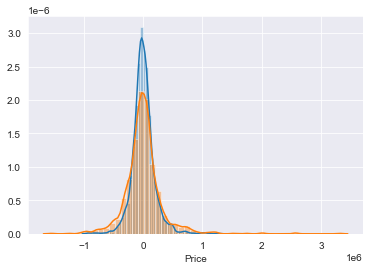

In [118]:
sns.distplot(y_train - CATB_ypred_train)

sns.distplot(y_test - CATB_ypred_test)

**Basic Evaluation of CATB Regressor Model**

1. There is an overfitting in RMSE score
2. MAE score is relative fit
3. The error distribution between train and test does not vary too much

Model Evaluation: Model is not good enough, need to be compared with other models

### Tuning Model - XGBoost

In [119]:
# Model Tuning
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3],
    'colsample_bytree': [0.4, 0.7, 1],
    'n_estimators': [300, 500],
    'bootstrap': [True, False],
    'min_samples_split' : [2, 5]
}

XGB_model = XGBRegressor(random_state=42)
XGB_cv_model = GridSearchCV(
    estimator=XGB_model, 
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5, 
    n_jobs=-1, 
    verbose=2)

XGB_cv_model.fit(X_train, y_train)
print("Best Params: ", XGB_cv_model.best_params_)
print("Best Score : ", XGB_cv_model.best_score_)

XGB_y_pred = XGB_cv_model.predict(X_test)

r_square = metrics.r2_score(y_test, XGB_y_pred)
mse = metrics.mean_squared_error(y_test, XGB_y_pred)
mae = metrics.median_absolute_error(y_test, XGB_y_pred)
ev = metrics.explained_variance_score(y_test, XGB_y_pred)

print("R Square               : ", r_square*100)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   47.7s finished


[16:45:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { bootstrap, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best Params:  {'bootstrap': True, 'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 500}
Best Score :  -201566.77189313615
R Square               :  74.62565834377087
Mean Squared Error     :  111094232323.02884
Root Mean Squared Error:  333308.0141896214
Median Absolute Error  :  132532.625
Explained Variance     :  0.7462569550418057


In [120]:
XGB_ypred_train = XGB_cv_model.predict(X_train)

XGB_r_square_train = metrics.r2_score(y_train, XGB_ypred_train)
XGB_mse_train = metrics.mean_squared_error(y_train, XGB_ypred_train)
XGB_mae_train = metrics.median_absolute_error(y_train, XGB_ypred_train)
XGB_ev_train = metrics.explained_variance_score(y_train, XGB_ypred_train)

print("R Square               : ", XGB_r_square_train*100)
print("Mean Squared Error     : ", XGB_mse_train)
print("Root Mean Squared Error: ", XGB_mse_train**(1/2))
print("Median Absolute Error  : ", XGB_mae_train)
print("Explained Variance     : ", XGB_ev_train)

R Square               :  90.44478163945196
Mean Squared Error     :  43625720677.57318
Root Mean Squared Error:  208867.71095019253
Median Absolute Error  :  100013.625
Explained Variance     :  0.9044478170085996


In [121]:
XGB_ypred_test = XGB_cv_model.predict(X_test)

XGB_r_square_test = metrics.r2_score(y_test, XGB_ypred_test)
XGB_mse_test = metrics.mean_squared_error(y_test, XGB_ypred_test)
XGB_mae_test = metrics.median_absolute_error(y_test, XGB_ypred_test)
XGB_ev_test = metrics.explained_variance_score(y_test, XGB_ypred_test)

print("R Square               : ", XGB_r_square_test*100)
print("Mean Squared Error     : ", XGB_mse_test)
print("Root Mean Squared Error: ", XGB_mse_test**(1/2))
print("Median Absolute Error  : ", XGB_mae_test)
print("Explained Variance     : ", XGB_ev_test)

R Square               :  74.62565834377087
Mean Squared Error     :  111094232323.02884
Root Mean Squared Error:  333308.0141896214
Median Absolute Error  :  132532.625
Explained Variance     :  0.7462569550418057


In [122]:
models = pd.DataFrame({
    'Model': ['Train CV Score', 'Test CV Score'],
    'R Square (R2)': [XGB_r_square_train, XGB_r_square_test],    
    'Mean Squared Error (MSE)': [XGB_mse_train, XGB_mse_test],    
    'Root Mean Squared Error (RMSE)': [XGB_mse_train**(1/2), XGB_mse_test**(1/2)],
    'Median Absolute Error (MAE)': [XGB_mae_train, XGB_mae_test],  
    'Explained Variance (EV)': [XGB_ev_train, XGB_ev_test], 
})

models.sort_values(by='Root Mean Squared Error (RMSE)', ascending=True).T

,0,1
Model,Train CV Score,Test CV Score
R Square (R2),0.904448,0.746257
Mean Squared Error (MSE),4.36257e+10,1.11094e+11
Root Mean Squared Error (RMSE),208868,333308
Median Absolute Error (MAE),100014,132533
Explained Variance (EV),0.904448,0.746257


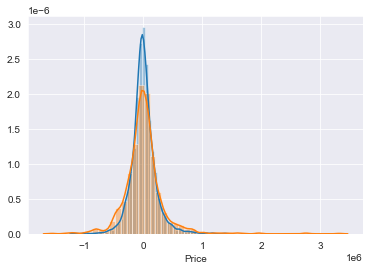

In [123]:
sns.distplot(y_train - XGB_ypred_train)

sns.distplot(y_test - XGB_ypred_test)

**Basic Evaluation of XGB Regressor Model**

1. There is an overfitting in RMSE score
2. MAE score is relative fit
3. The error distribution between train and test does not vary too much

Model Evaluation: Model is not good enough, need to be compared with other models

### Tuning Model - LGBM Regressor

In [124]:
# Model Tuning
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3],
    'colsample_bytree': [0.4, 0.7, 1],
    'n_estimators': [300, 500],
    'bootstrap': [True, False],
    'min_samples_split' : [2, 5]
}

LGBM_model = LGBMRegressor(random_state=42)
LGBM_cv_model = GridSearchCV(
                estimator= LGBM_model, 
                param_grid=param_grid,
                scoring='neg_mean_absolute_error',
                cv=5, 
                n_jobs=-1, 
                verbose=2)

LGBM_cv_model.fit(X_train, y_train)
print("Best Params: ", LGBM_cv_model.best_params_)
print("Best Score : ", LGBM_cv_model.best_score_)

LGBM_y_pred = LGBM_cv_model.predict(X_test)

r_square = metrics.r2_score(y_test, LGBM_y_pred)
mse = metrics.mean_squared_error(y_test, LGBM_y_pred)
mae = metrics.median_absolute_error(y_test, LGBM_y_pred)
ev = metrics.explained_variance_score(y_test, LGBM_y_pred)

print("R Square               : ", r_square*100)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   11.8s finished


[LightGBM] [Warning] Unknown parameter: bootstrap
[LightGBM] [Warning] Unknown parameter: min_samples_split
Best Params:  {'bootstrap': True, 'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 500}
Best Score :  -199491.44562092872
R Square               :  74.91722606849731
Mean Squared Error     :  109817687181.97672
Root Mean Squared Error:  331387.5181445081
Median Absolute Error  :  132167.32387233054
Explained Variance     :  0.7491753657581062


In [125]:
LGBM_ypred_train = LGBM_cv_model.predict(X_train)

LGBM_r_square_train = metrics.r2_score(y_train, LGBM_ypred_train)
LGBM_mse_train = metrics.mean_squared_error(y_train, LGBM_ypred_train)
LGBM_mae_train = metrics.median_absolute_error(y_train, LGBM_ypred_train)
LGBM_ev_train = metrics.explained_variance_score(y_train, LGBM_ypred_train)

print("R Square               : ", LGBM_r_square_train*100)
print("Mean Squared Error     : ", LGBM_mse_train)
print("Root Mean Squared Error: ", LGBM_mse_train**(1/2))
print("Median Absolute Error  : ", LGBM_mae_train)
print("Explained Variance     : ", LGBM_ev_train)

R Square               :  88.52623815709877
Mean Squared Error     :  52385106273.03931
Root Mean Squared Error:  228877.9287590643
Median Absolute Error  :  105419.73639299907
Explained Variance     :  0.8852623815709878


In [126]:
LGBM_ypred_test = LGBM_cv_model.predict(X_test)

LGBM_r_square_test = metrics.r2_score(y_test, LGBM_ypred_test)
LGBM_mse_test = metrics.mean_squared_error(y_test, LGBM_ypred_test)
LGBM_mae_test = metrics.median_absolute_error(y_test, LGBM_ypred_test)
LGBM_ev_test = metrics.explained_variance_score(y_test, LGBM_ypred_test)

print("R Square               : ", LGBM_r_square_test*100)
print("Mean Squared Error     : ", LGBM_mse_test)
print("Root Mean Squared Error: ", LGBM_mse_test**(1/2))
print("Median Absolute Error  : ", LGBM_mae_test)
print("Explained Variance     : ", LGBM_ev_test)

R Square               :  74.91722606849731
Mean Squared Error     :  109817687181.97672
Root Mean Squared Error:  331387.5181445081
Median Absolute Error  :  132167.32387233054
Explained Variance     :  0.7491753657581062


In [127]:
models = pd.DataFrame({
    'Model': ['Train CV Score', 'Test CV Score'],
    'R Square (R2)': [LGBM_r_square_train, LGBM_r_square_test],    
    'Mean Squared Error (MSE)': [LGBM_mse_train, LGBM_mse_test],    
    'Root Mean Squared Error (RMSE)': [LGBM_mse_train**(1/2), LGBM_mse_test**(1/2)],
    'Median Absolute Error (MAE)': [LGBM_mae_train, LGBM_mae_test],  
    'Explained Variance (EV)': [LGBM_ev_train, LGBM_ev_test], 
})

models.sort_values(by='Root Mean Squared Error (RMSE)', ascending=True).T

,0,1
Model,Train CV Score,Test CV Score
R Square (R2),0.885262,0.749172
Mean Squared Error (MSE),5.23851e+10,1.09818e+11
Root Mean Squared Error (RMSE),228878,331388
Median Absolute Error (MAE),105420,132167
Explained Variance (EV),0.885262,0.749175


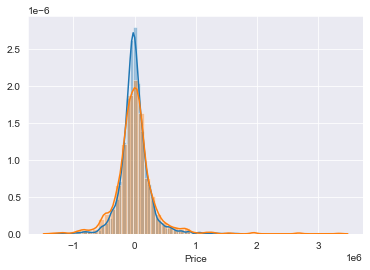

In [128]:
sns.distplot(y_train - LGBM_ypred_train)
sns.distplot(y_test - LGBM_ypred_test)

**Basic Evaluation of LGBM Regressor Model**

1. There is an overfitting in RMSE score
2. MAE score is relative fit
3. The error distribution between train and test does not vary too much

Model Evaluation: Model is not good enough, need to be compared with other models

## Model Evaluation & Summary

There are three metrics which are generally used for evaluation of Regression problems (like Linear Regression, Decision Tree Regression, Random Forest Regression etc.):

1. Mean Absolute Error (MAE): This measures the absolute average distance between the real data and the predicted data, but it fails to punish large errors in prediction.
2. Mean Square Error (MSE): This measures the squared average distance between the real data and the predicted data. Here, larger errors are well noted (better than MAE). But the disadvantage is that it also squares up the units of data as well. So, evaluation with different units is not at all justified.
3. Root Mean Squared Error (RMSE): This is actually the square root of MSE. Also, this metrics solves the problem of squaring the units.

Using MAE over MSE and RMSE is more advantageous. MAE is the most intuitive of them all. The name in itself is pretty good at telling us what’s going on. RMSE does not describe average error alone and has other implications that are more difficult to tease out and understand.

In [129]:
price_x = df_new['Price'].mean()

print('Average Price of Dataset = ', price_x)

print('\nCATB MAE Score=', (CATB_mae_test))
print('XGB MAE Score=', (XGB_mae_test))
print('LGBM MAE Score=', (LGBM_mae_test))

print('\nCATB MAE % Difference with Average Price =', ((CATB_mae_test/price_x)*100))
print('XGB MAE % Difference with Average Price =', ((XGB_mae_test/price_x)*100))
print('LGBM MAE % Difference with Average Price =', ((LGBM_mae_test/price_x)*100))

Average Price of Dataset =  1137445.0662

CATB MAE Score= 123504.38065508736
XGB MAE Score= 132532.625
LGBM MAE Score= 132167.32387233054

CATB MAE % Difference with Average Price = 10.858052342491876
XGB MAE % Difference with Average Price = 11.651782485001034
LGBM MAE % Difference with Average Price = 11.619666549161611


**MAE Evaluation**

This study aims to get the lowest score of prediction error, but a model with error more than 10% is unacceptable.
Hence, all models are good enough in making prediction because each model has a MAE score lower than 10%.

1. From this information, we could see that CATB model has the best MAE score, because it only shows 8.42% difference from average price of the house
2. Meanwhile, XGB model has the biggest MAE score of 9.27% difference from the average price in the dataset.

In [130]:
RMSE_CATB_train = (CATB_mse_train**(1/2))
RMSE_CATB_test = (CATB_mse_test**(1/2))
RMSE_XGB_train = (XGB_mse_train**(1/2))
RMSE_XGB_test = (XGB_mse_test**(1/2))
RMSE_LGBM_train = (LGBM_mse_train**(1/2))
RMSE_LGBM_test = (LGBM_mse_test**(1/2))


models = pd.DataFrame({
    'Model': ['CATBoost Train', 'CATBoost Test', 'XGB  Train ', 'XGB  Test', 'LGBM Train', 'LGBM Test'],
    'R Square (R2)': [CATB_r_square_train, CATB_r_square_test, 
                      XGB_r_square_train, XGB_r_square_test, 
                      LGBM_r_square_train, LGBM_r_square_test],    
    'Mean Squared Error (MSE)': [CATB_mse_train, CATB_mse_test, 
                                 XGB_mse_train, XGB_mse_test, 
                                 LGBM_mse_train, LGBM_mse_test],   
    'Root Mean Squared Error (RMSE)': [RMSE_CATB_train, RMSE_CATB_test, 
                                       RMSE_XGB_train, RMSE_XGB_test, 
                                       RMSE_LGBM_train, RMSE_LGBM_test],
    'Median Absolute Error (MAE)': [CATB_mae_train, CATB_mae_test, 
                                    XGB_mae_train, XGB_mae_test, 
                                    LGBM_mae_train, LGBM_mae_test],  
    'Explained Variance (EV)': [CATB_ev_train, CATB_ev_test, 
                                XGB_ev_train, XGB_ev_test, 
                                LGBM_ev_train, LGBM_ev_test], 
})

models.T

,0,1,2,3,4,5
Model,CATBoost Train,CATBoost Test,XGB Train,XGB Test,LGBM Train,LGBM Test
R Square (R2),0.922718,0.758834,0.904448,0.746257,0.885262,0.749172
Mean Squared Error (MSE),3.52843e+10,1.05587e+11,4.36257e+10,1.11094e+11,5.23851e+10,1.09818e+11
Root Mean Squared Error (RMSE),187841,324942,208868,333308,228878,331388
Median Absolute Error (MAE),92598.1,123504,100014,132533,105420,132167
Explained Variance (EV),0.922718,0.758835,0.904448,0.746257,0.885262,0.749175


### Model Score Summary

In [131]:
RMSE_CATB_train = (CATB_mse_train**(1/2))
RMSE_CATB_test = (CATB_mse_test**(1/2))
RMSE_XGB_train = (XGB_mse_train**(1/2))
RMSE_XGB_test = (XGB_mse_test**(1/2))
RMSE_LGBM_train = (LGBM_mse_train**(1/2))
RMSE_LGBM_test = (LGBM_mse_test**(1/2))


models = pd.DataFrame({
    'Model': ['CATBoost Difference Score', 'XGB Difference Score', 'LGBM Difference Score' ],
    'R Square (R2)': [(CATB_r_square_train-CATB_r_square_test), 
                      ((XGB_r_square_train-XGB_r_square_test)), 
                      ((LGBM_r_square_train-LGBM_r_square_test))],    
    'Mean Squared Error (MSE)': [(CATB_mse_train-CATB_mse_test), 
                                 ((XGB_mse_train-XGB_mse_test)), 
                                 ((LGBM_mse_train-LGBM_mse_test))],   
    'Root Mean Squared Error (RMSE)': [((RMSE_CATB_train-RMSE_CATB_test)), 
                                       ((RMSE_XGB_train-RMSE_XGB_test)), 
                                       ((RMSE_LGBM_train-RMSE_LGBM_test))],
    'Median Absolute Error (MAE)': [((CATB_mae_train-CATB_mae_test)), 
                                    ((XGB_mae_train-XGB_mae_test)), 
                                    ((LGBM_mae_train-LGBM_mae_test))],  
    'Explained Variance (EV)': [((CATB_ev_train-CATB_ev_test)), 
                                ((XGB_ev_train-XGB_ev_test)), 
                                ((LGBM_ev_train-LGBM_ev_test))], 
})

models.T

,0,1,2
Model,CATBoost Difference Score,XGB Difference Score,LGBM Difference Score
R Square (R2),0.163883,0.158191,0.13609
Mean Squared Error (MSE),-7.0303e+10,-6.74685e+10,-5.74326e+10
Root Mean Squared Error (RMSE),-137101,-124440,-102510
Median Absolute Error (MAE),-30906.2,-32519,-26747.6
Explained Variance (EV),0.163883,0.158191,0.136087


**Difference Score Model Summary**

With a further evaluation, comparing the difference between data train result and data test result shows a following inference:

1. LGBM has a better stability, because its R2 and EV difference score is the lowest than other models. This means LGBM model could provide a more stable prediction than other models.
2. LGBM has the lowest MSE and RMSE difference score than other models. This means that LGBM model has lower error prediction than other models.
3. LGBM has the lowest MAE difference than other models. This means that LGBM is relatively more stable when making a prediction with average score of the house price dataset.

In [ ]:
RMSE_CATB_train = (CATB_mse_train**(1/2))
RMSE_CATB_test = (CATB_mse_test**(1/2))
RMSE_XGB_train = (XGB_mse_train**(1/2))
RMSE_XGB_test = (XGB_mse_test**(1/2))
RMSE_LGBM_train = (LGBM_mse_train**(1/2))
RMSE_LGBM_test = (LGBM_mse_test**(1/2))


models = pd.DataFrame({
    'Model': ['CATBoost % Difference Score', 'XGB % Difference Score', 'LGBM % Difference Score' ],
    'R Square (R2)': [(1-(CATB_r_square_train/CATB_r_square_test)), 
                      (1-(XGB_r_square_train/XGB_r_square_test)), 
                      (1-(LGBM_r_square_train/LGBM_r_square_test))],    
    'Mean Squared Error (MSE)': [(1-(CATB_mse_train/CATB_mse_test)), 
                                 (1-(XGB_mse_train/XGB_mse_test)), 
                                 (1-(LGBM_mse_train/LGBM_mse_test))],   
    'Root Mean Squared Error (RMSE)': [(1-(RMSE_CATB_train/RMSE_CATB_test)), 
                                       (1-(RMSE_XGB_train/RMSE_XGB_test)), 
                                       (1-(RMSE_LGBM_train/RMSE_LGBM_test))],
    'Median Absolute Error (MAE)': [(1-(CATB_mae_train/CATB_mae_test)), 
                                    (1-(XGB_mae_train/XGB_mae_test)), 
                                    ((1-LGBM_mae_train/LGBM_mae_test))],  
    'Explained Variance (EV)': [(1-(CATB_ev_train/CATB_ev_test)), 
                                (1-(XGB_ev_train/XGB_ev_test)), 
                                (1-(LGBM_ev_train/LGBM_ev_test))], 
})

models.T

**% Difference Score Model Summary**

With a further evaluation, comparing the % difference between data train result and data test result shows a following inference:

1. LGBM has a better stability, because its R2 and EV difference % score is the lowest than other models.
2. LGBM has the lowest MSE and RMSE % difference score than other models, while CATB has the highest RMSE % difference
3. LGBM has the lowest MAE % difference than other models, while CATB has the highest MAE % difference
4. The % difference score could help understand that LGBM has the best overall fit model in comparison to other two, because the % difference score between each metric is the lowest 

### Model Prediction vs Perfect Fit Evaluation

In [133]:
price_x = df_new['Price'].describe()
price_x

count    5.000000e+03
mean     1.137445e+06
std      6.715913e+05
min      8.500000e+04
25%      6.800000e+05
50%      9.500000e+05
75%      1.417062e+06
max      6.500000e+06
Name: Price, dtype: float64

[Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 0, 'Test True Y'),
 Text(0.5, 1.0, 'CATB Model Predictions vs Perfect Fit')]

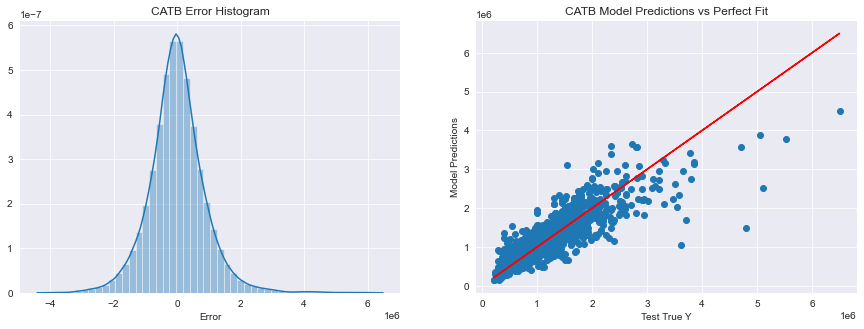

In [135]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,CATB_ypred_test)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(1500, 1) - CATB_ypred_test
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='CATB Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='CATB Model Predictions vs Perfect Fit')

[Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 0, 'Test True Y'),
 Text(0.5, 1.0, 'XGB Model Predictions vs Perfect Fit')]

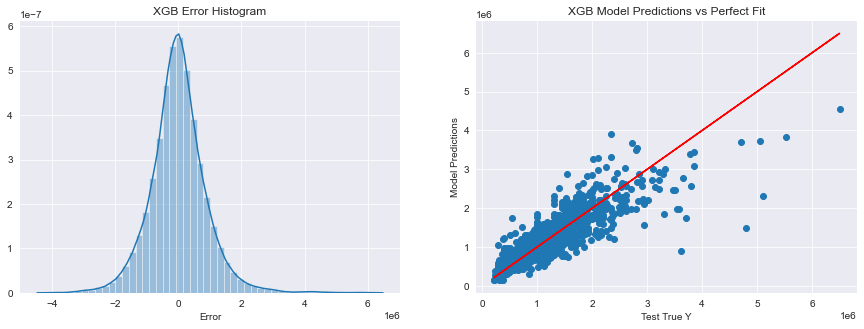

In [136]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,XGB_ypred_test)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(1500, 1) - XGB_ypred_test
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='XGB Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='XGB Model Predictions vs Perfect Fit')

[Text(0, 0.5, 'LGBM Model Predictions'),
 Text(0.5, 0, 'Test True Y'),
 Text(0.5, 1.0, 'LGBM Model Predictions vs Perfect Fit')]

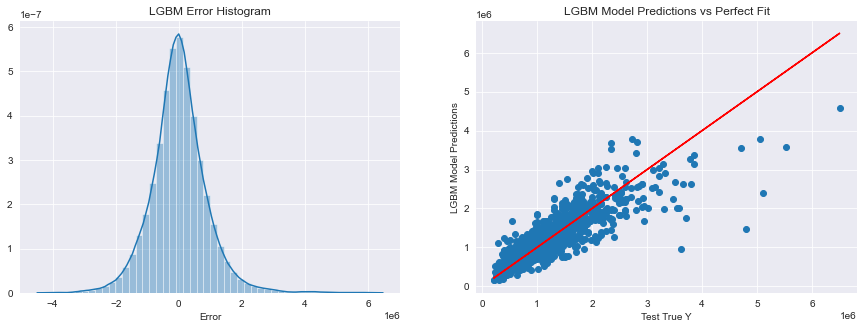

In [137]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,LGBM_ypred_test)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(1500, 1) - LGBM_ypred_test
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='LGBM Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='LGBM Model Predictions', title='LGBM Model Predictions vs Perfect Fit')

**Model predictions vs perfect fit**

We can compare the model predictions with a perfect fit to see how accurate the model is.
The red line represents the perfect prediction.
All three models shows a similar pattern. The results are being punish by the outliers, which are the expensive houses. Our model is not good predicting luxury houses. On the other hand, our model is good predicting the price of houses between 0 and  USD 2 million. There is a good fit, if we refer that the price distribution of the model is left skewed than normally distributed.

It may be worth it retraining our model just on price houses below AUD 4 million.

### Final Conclusion

**Model Recommendation**

Based on previous model evaluations, we tell some conclusion and recommendation:

1. Despite CATB has the best MAE score, but it has several problems, which are:
    - It has the highest overfitting score in comparison to XGB and LGBM models
    - High MSE and RMSE score
2. Both XGB and LGBM model results is relatively close to each other. Hence, both of the models are recommended to be used in this analysis.
3. LGBM has an upper advantage than XGB because it has the best overall score, and also faster process and iteration than XGB. Therefore, LGBM is a better model in comparison to other models.

### Further Interpretation on LGBM Analysis

In [138]:
corr_ranking = df_new.corr()['Price'].sort_values(ascending=False)[1:]
corr_ranking

Rooms            0.591419
Bedroom2         0.566607
Bathroom         0.522683
Car              0.320706
Longtitude       0.299469
Postcode         0.294022
Landsize         0.098246
Propertycount    0.035145
Distance        -0.023724
Lattitude       -0.238287
Name: Price, dtype: float64

In [139]:
columns = ['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'Lattitude', 'Longitude', 'Propertcount']

LGBM_Importance = pd.DataFrame({
    'Importance': LGBM_cv_model.best_estimator_.feature_importances_*100}, index=columns)

LGBM_Importance.sort_values(by='Importance', ascending=False)

,Importance
Landsize,77800
Longitude,52900
Lattitude,45800
Distance,32100
Propertcount,22200
Rooms,20900
Postcode,18200
Bathroom,15200
Car,13300
Bedroom2,8600


**Model Recommendation**

For a house seller and reseller:
1. They would have a better chance to get higher price if they have bigger landsize, loongitudem and lattitude
1. 

Belum selesai mas >_<